In [5]:
import numpy as np
import random as rd
#import tensorflow as tf

from keras.layers import Dense, Embedding, LSTM, Input, Bidirectional
from keras.models import Model
from keras.optimizers import RMSprop

#Import another jupyter notebook
import import_ipynb
from AttentionLayer import *
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

Using TensorFlow backend.
C:\Users\schok\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\schok\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\schok\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\schok\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [6]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [7]:
path = 'data/'
outputpath ='outputs/01_abilstm_samEval2018/'

In [8]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

In [9]:
#Load pretrained embeddings
import gensim
from gensim.models import KeyedVectors

#Pretrained Google News Embeddings, Dimension 300
GOOGLEEMB = path + 'GoogleNews-vectors-negative300.bin'

embedding= KeyedVectors.load_word2vec_format(GOOGLEEMB, binary=True)

word_vectors = embedding.wv

C:\Users\schok\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.


In [10]:
#Create embedding-matrix, serves the Keras Embedding Layer as weigths
EMBEDDING_DIM=300

embedding_matrix = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

## Hyperparameter for all models

In [11]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
softmax = True
optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 0.0000001)
lossfunction ='binary_crossentropy'

## AttentiveBiLSTM one BiLSTM-layer, 400 neurons

In [14]:
#Define the Networkarchitekture
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#BiLSTM Layer
x = Bidirectional(LSTM(400, return_sequences=True, activation='tanh'))(embedded_sequences)

#Attention Layer
x = Attention()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model1 = Model(inputs=[comment_input], outputs=preds)

Instructions for updating:
Use tf.cast instead.

-----Fold 1--------


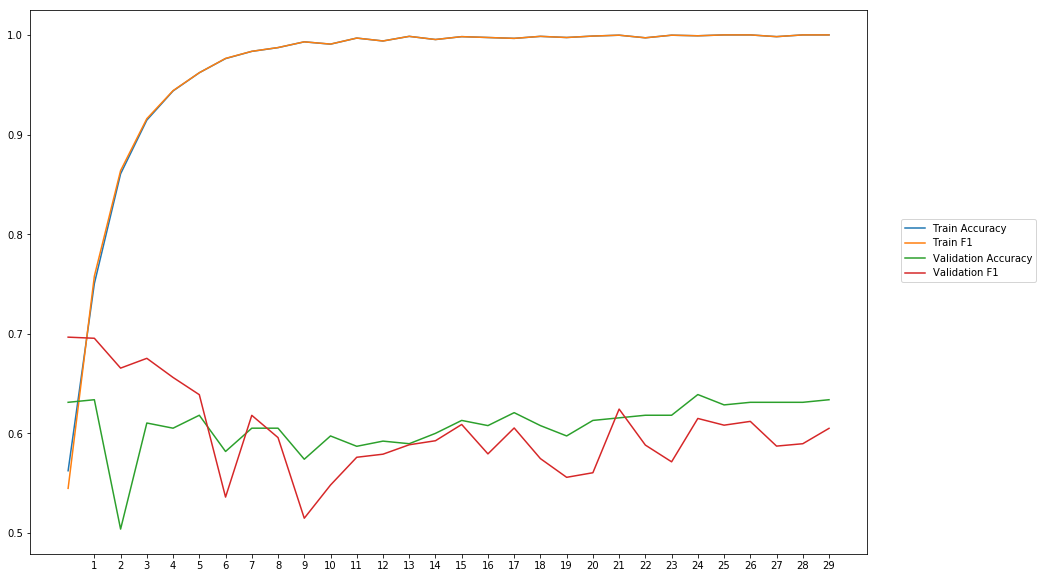

Average Accuracy: 60.81%
Average Precision: 61.75%
Average Recall: 60.31%
Average F1: 60.21%

-----Fold 2--------


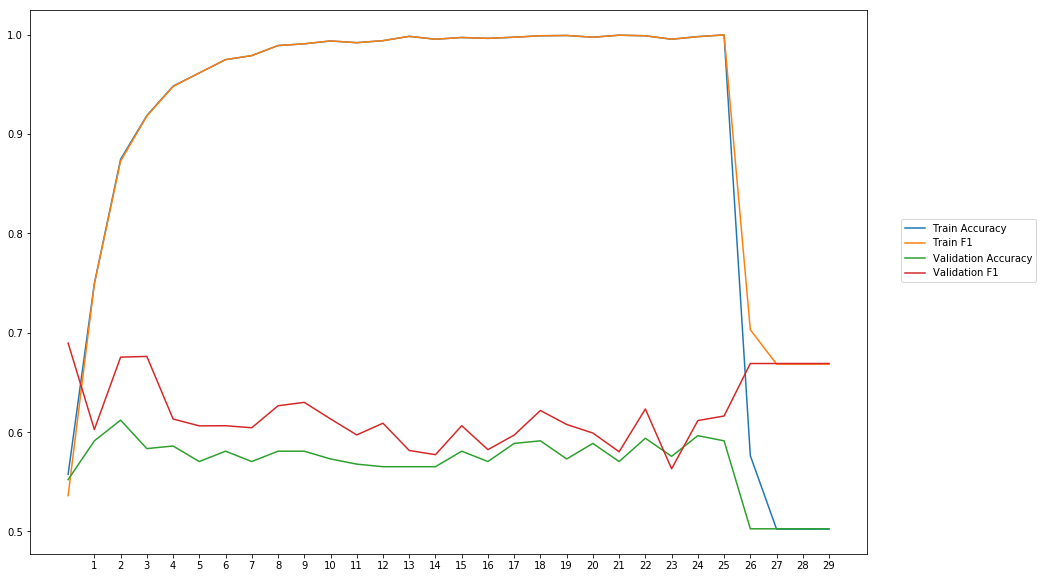

Average Accuracy: 56.91%
Average Precision: 56.20%
Average Recall: 71.12%
Average F1: 61.97%

-----Fold 3--------


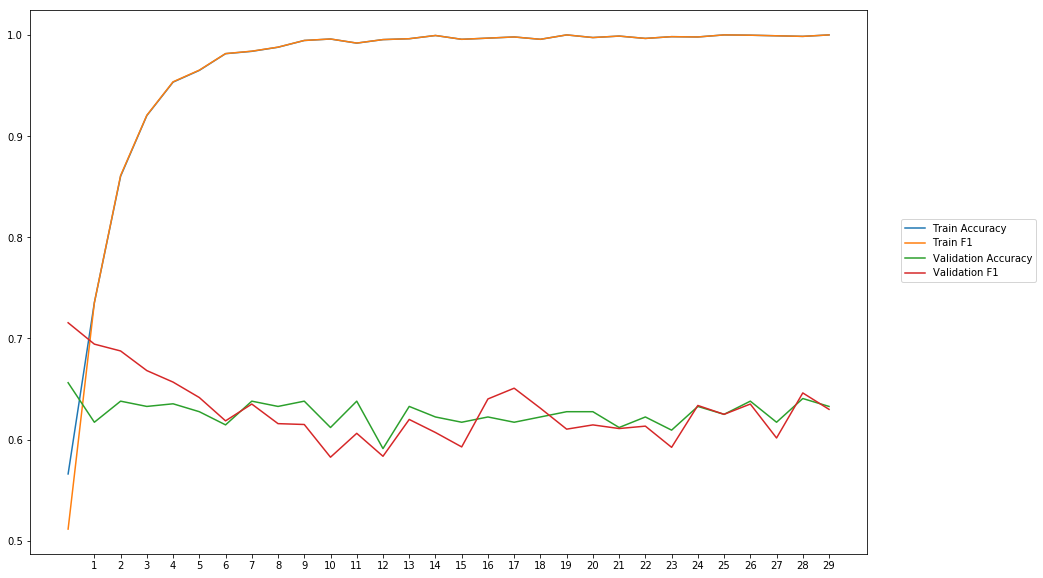

Average Accuracy: 62.64%
Average Precision: 62.84%
Average Recall: 63.68%
Average F1: 62.92%

-----Fold 4--------


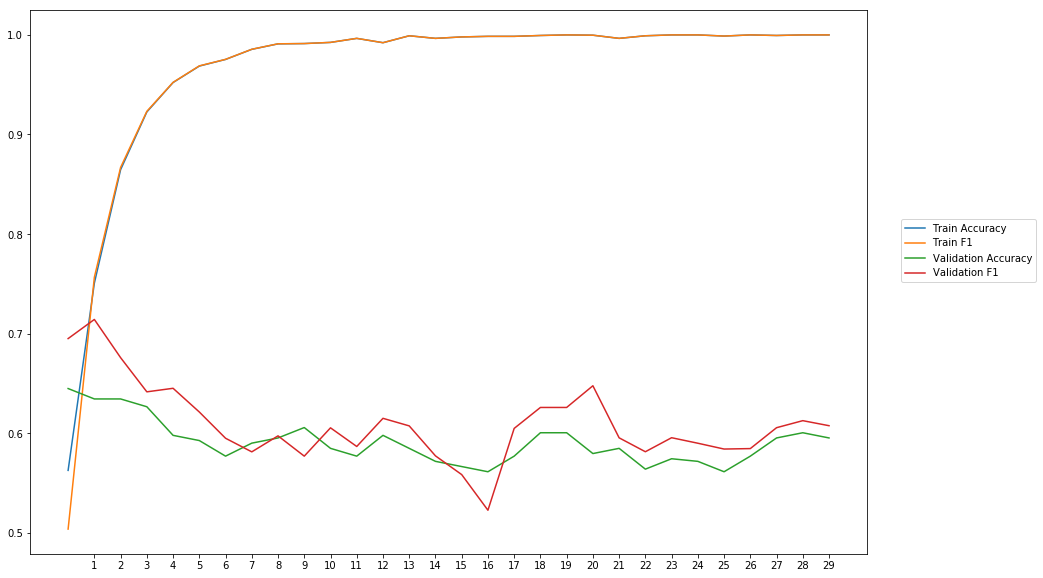

Average Accuracy: 59.09%
Average Precision: 58.36%
Average Recall: 64.25%
Average F1: 60.93%

-----Fold 5--------


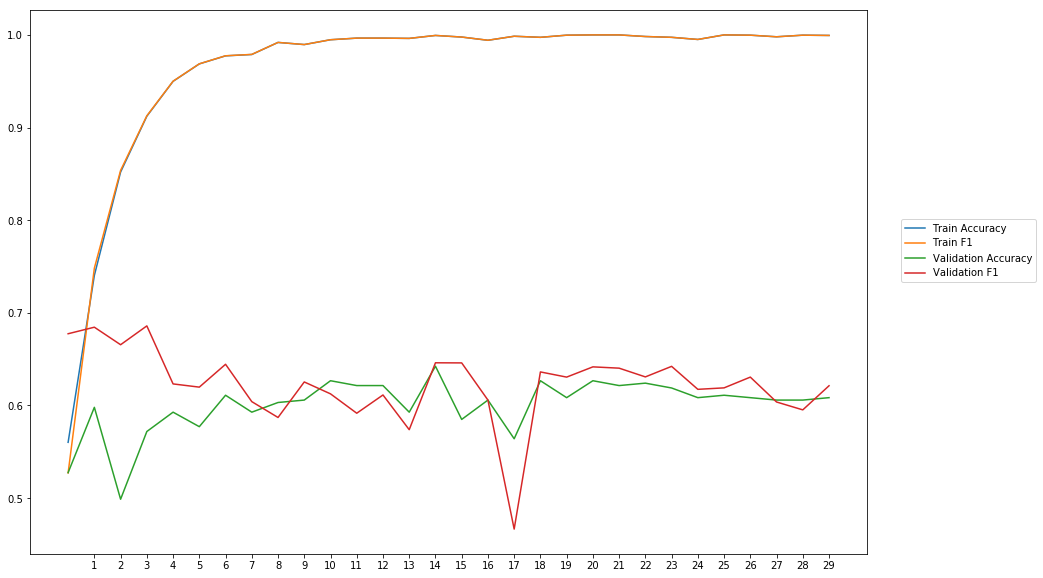

Average Accuracy: 60.03%
Average Precision: 59.69%
Average Recall: 66.93%
Average F1: 62.26%

-----Fold 6--------


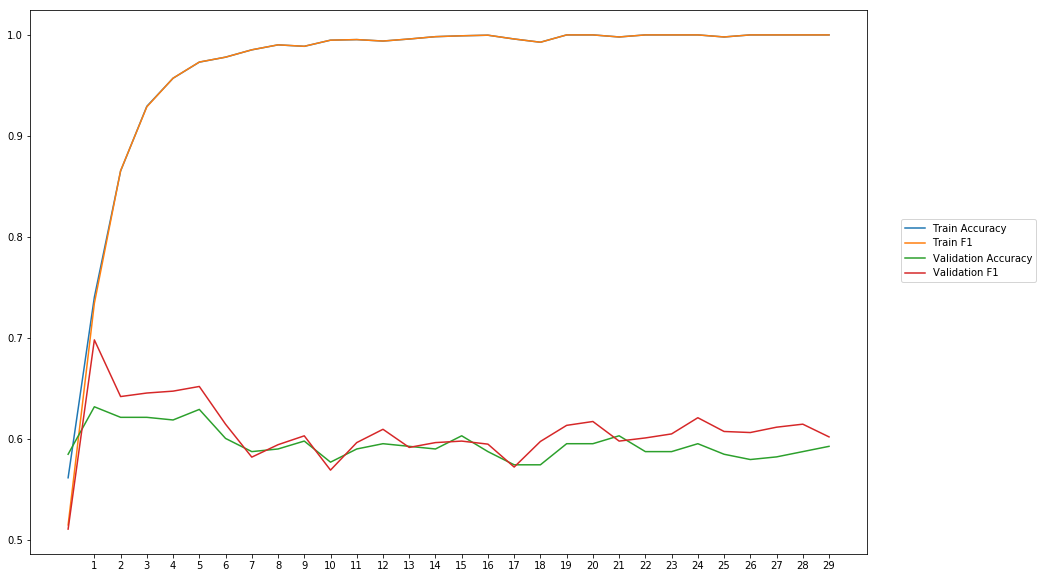

Average Accuracy: 59.53%
Average Precision: 59.11%
Average Recall: 62.78%
Average F1: 60.71%

-----Fold 7--------


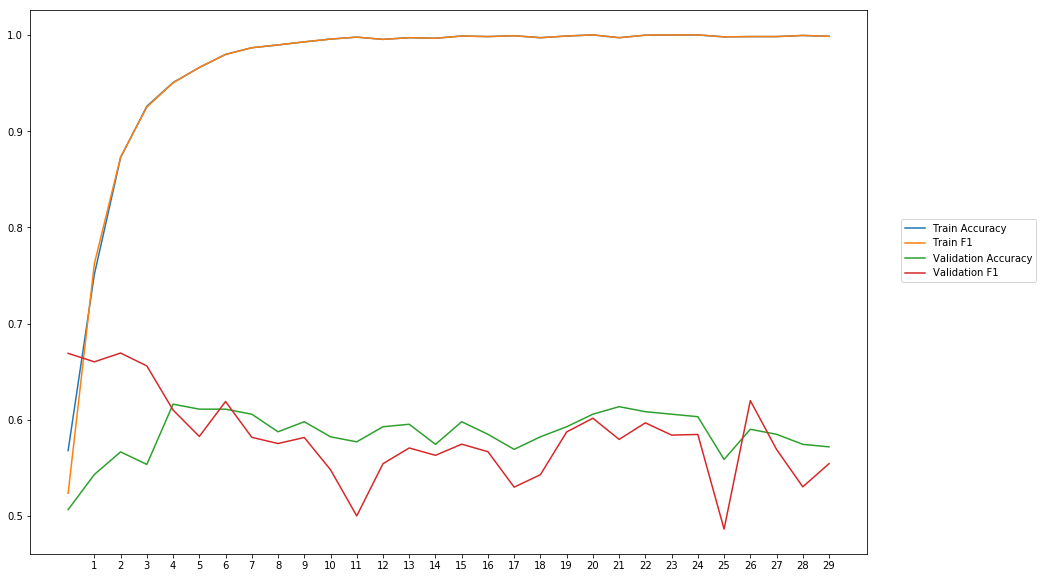

Average Accuracy: 58.55%
Average Precision: 59.41%
Average Recall: 58.82%
Average F1: 58.16%

-----Fold 8--------


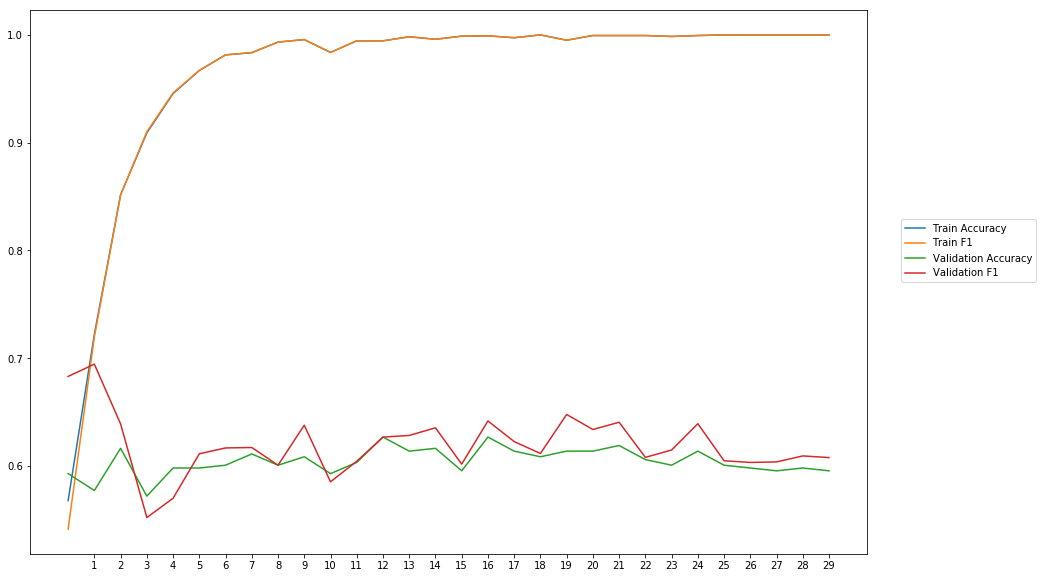

Average Accuracy: 60.41%
Average Precision: 59.85%
Average Recall: 64.86%
Average F1: 61.96%

-----Fold 9--------


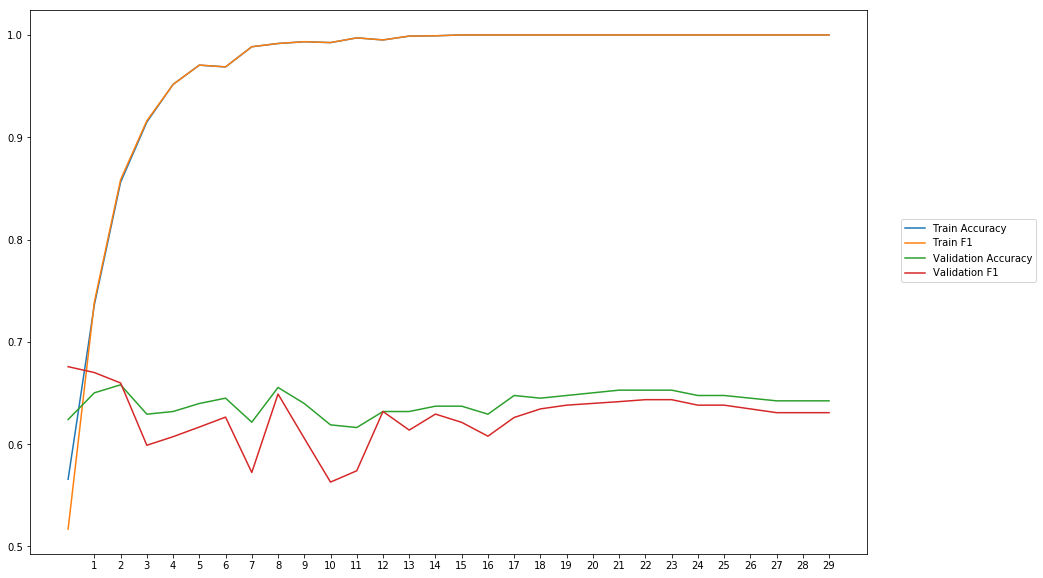

Average Accuracy: 64.04%
Average Precision: 65.37%
Average Recall: 60.43%
Average F1: 62.64%

-----Fold 10--------


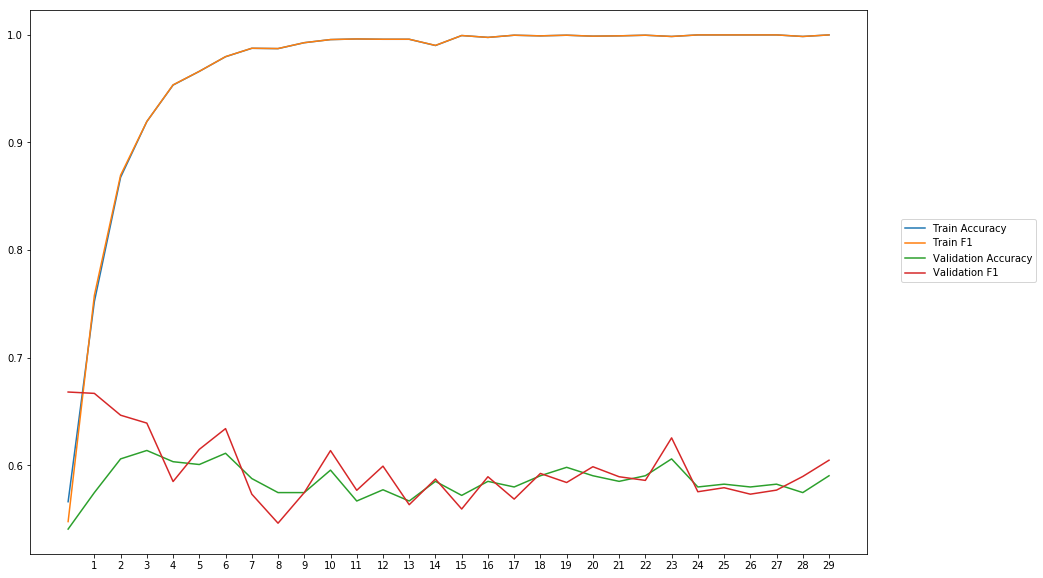

Average Accuracy: 58.53%
Average Precision: 58.37%
Average Recall: 61.55%
Average F1: 59.58%

-------Overallresults-------


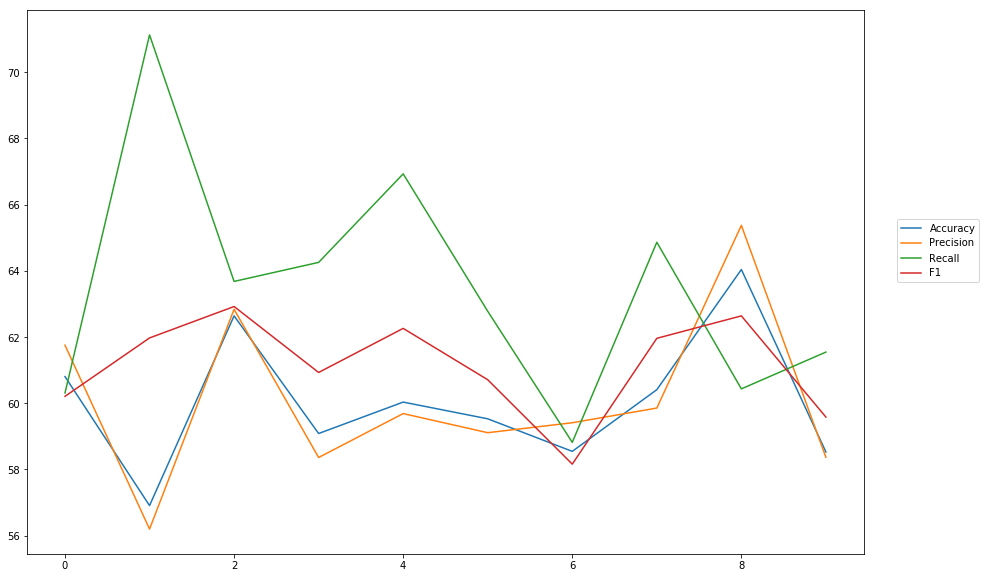

Accuracy: Mean = 60.05% (+/- 1.97%), Max = 64.04%, Min =  56.91%
Precision: Mean = 60.10% (+/- 2.47%), Max = 65.37%, Min =  56.20%
Recall: Mean = 63.47% (+/- 3.44%), Max = 71.12%, Min =  58.82%
F1: Mean = 61.13% (+/- 1.43%), Max = 62.92%, Min =  58.16%


In [9]:
#Train and test with 10-fold corss validation
cross_val(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'abilstm_1_400')  

## AttentiveBiLSTM two BiLSTM-Layer, each 400 Neurons

In [ ]:
#Define the Networkarchitekture
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer2 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences2 = wv_layer2(comment_input2)

#BiLSTM Layer
x2 = Bidirectional(LSTM(400, return_sequences=True, activation='tanh'))(embedded_sequences2)
x2 = Bidirectional(LSTM(400, return_sequences=True, activation='tanh'))(x2)

#Attention Layer
x2 = Attention()(x2)

#Output (Dense) Layer
preds2 = Dense(2, activation='softmax')(x2)

# build the model
model2 = Model(inputs=[comment_input2], outputs=preds2)


-----Fold 1--------


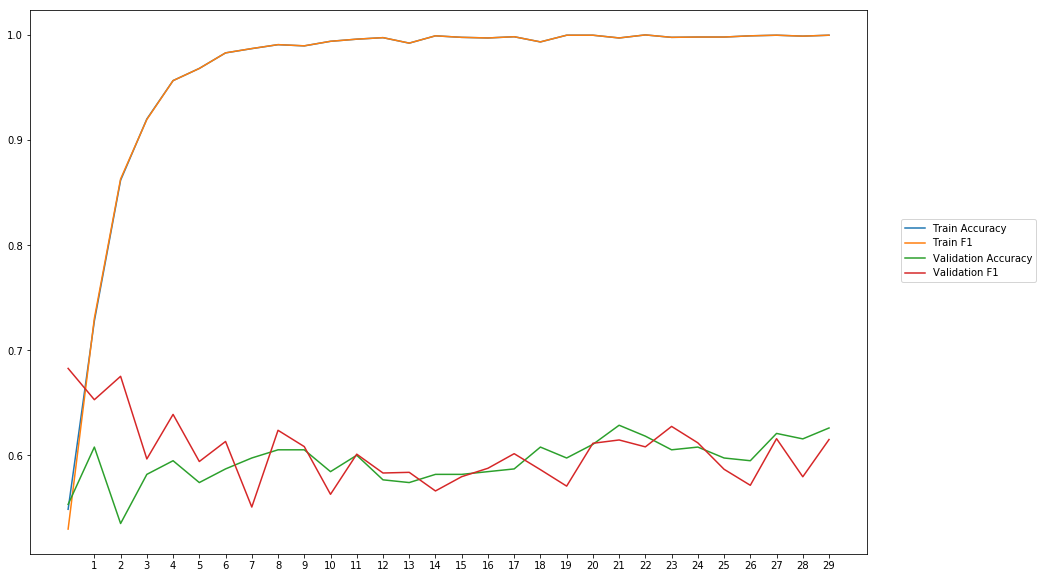

Average Accuracy: 59.47%
Average Precision: 59.61%
Average Recall: 62.25%
Average F1: 60.33%

-----Fold 2--------


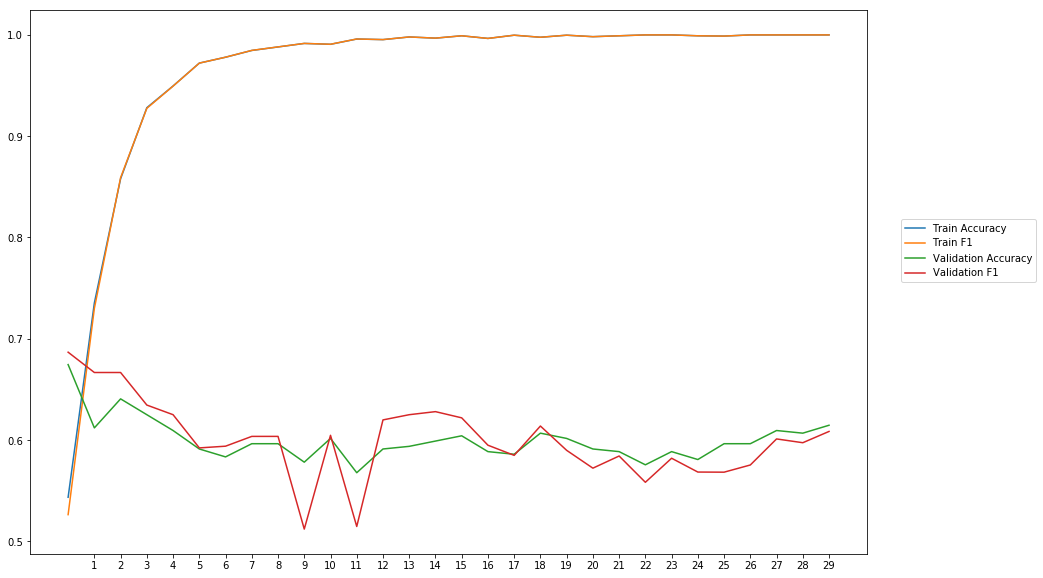

Average Accuracy: 59.98%
Average Precision: 60.22%
Average Recall: 60.17%
Average F1: 59.99%

-----Fold 3--------


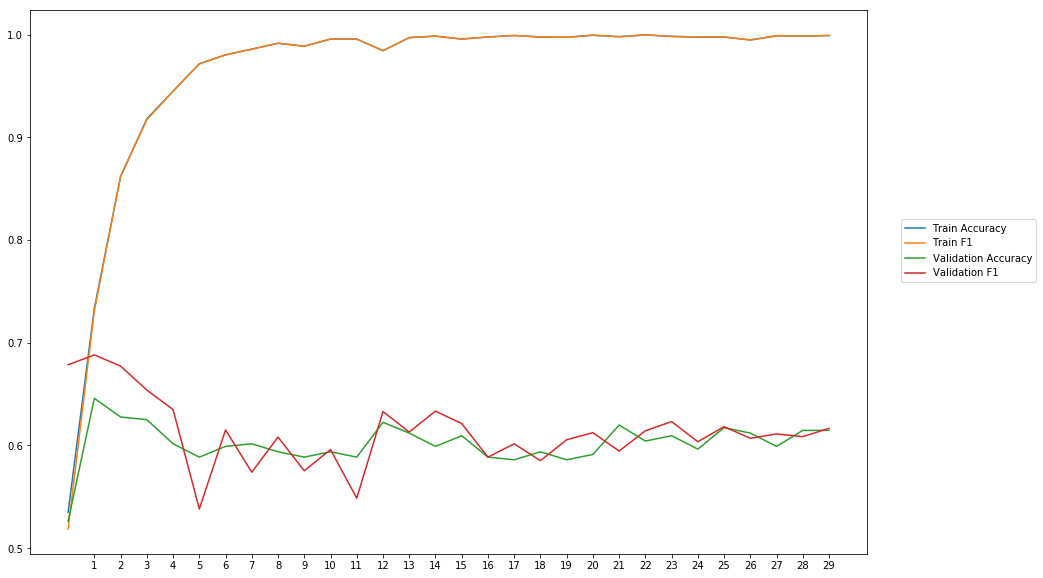

Average Accuracy: 60.18%
Average Precision: 60.13%
Average Recall: 63.30%
Average F1: 61.26%

-----Fold 4--------


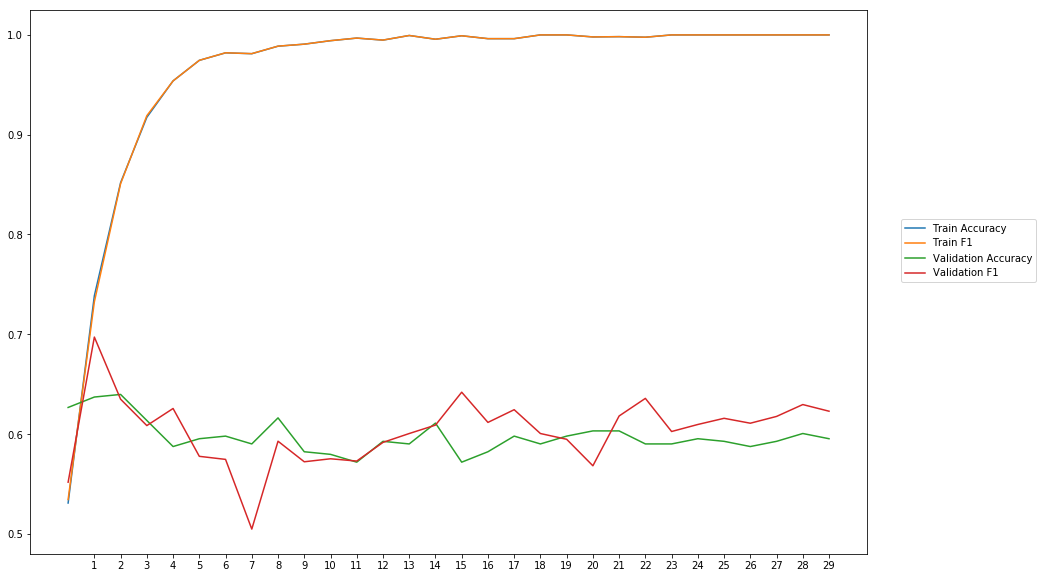

Average Accuracy: 59.74%
Average Precision: 59.84%
Average Recall: 61.63%
Average F1: 60.31%

-----Fold 5--------


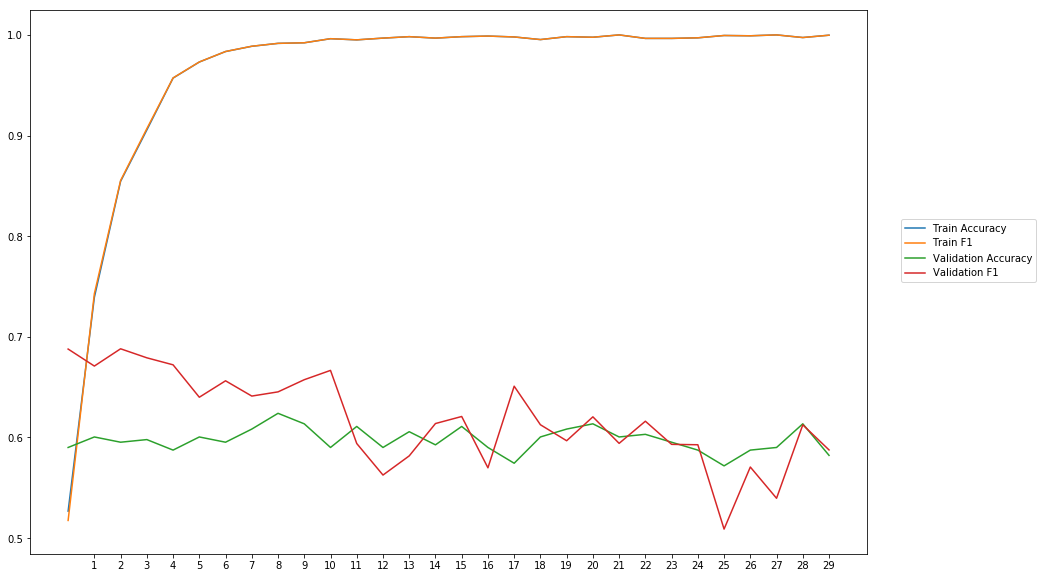

Average Accuracy: 59.77%
Average Precision: 59.15%
Average Recall: 66.28%
Average F1: 61.82%

-----Fold 6--------


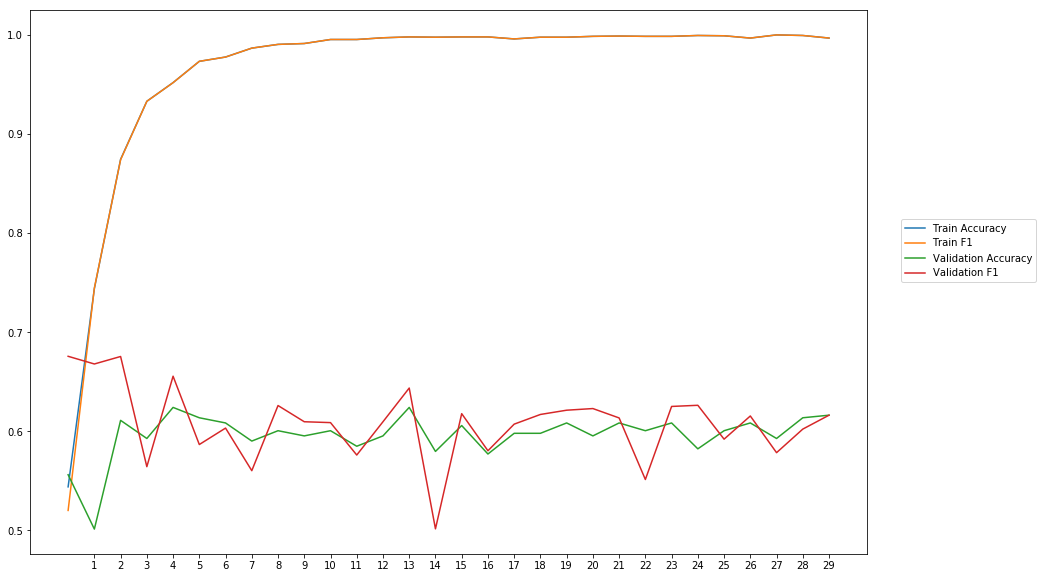

Average Accuracy: 59.63%
Average Precision: 59.61%
Average Recall: 63.49%
Average F1: 60.83%

-----Fold 7--------


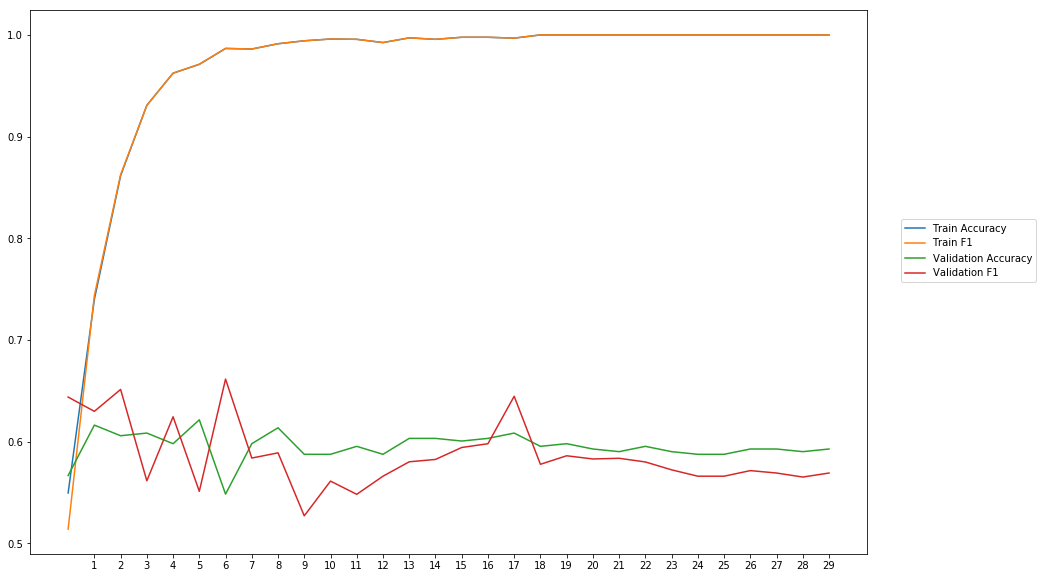

Average Accuracy: 59.52%
Average Precision: 60.41%
Average Recall: 57.88%
Average F1: 58.62%

-----Fold 8--------


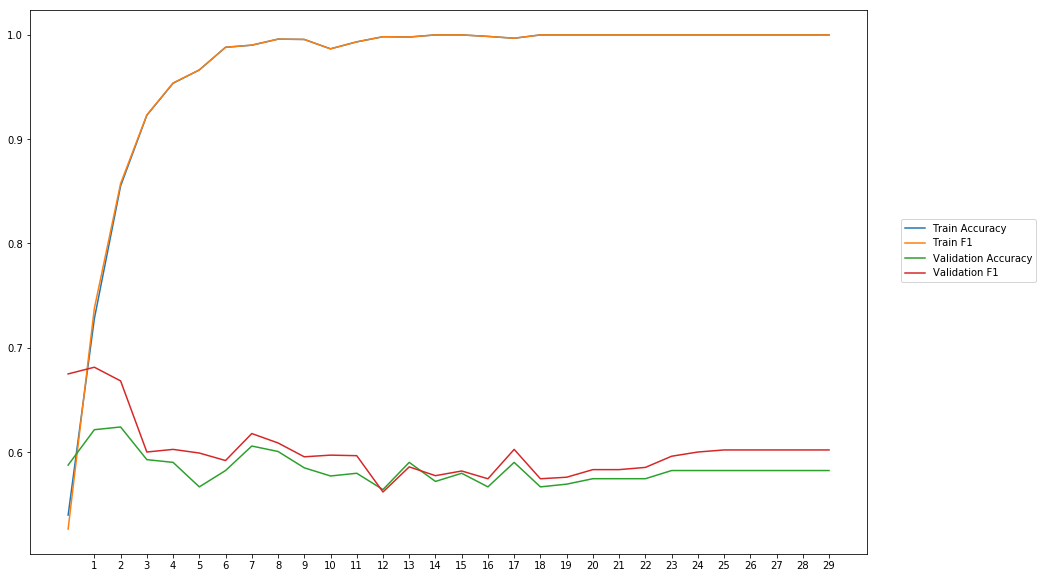

Average Accuracy: 58.36%
Average Precision: 57.80%
Average Recall: 62.85%
Average F1: 60.08%

-----Fold 9--------


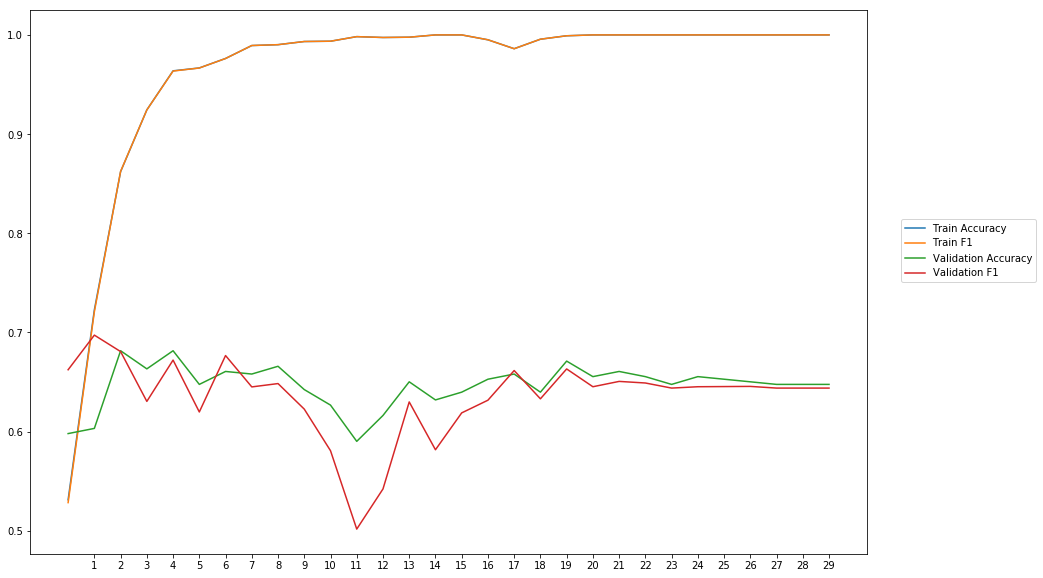

Average Accuracy: 64.66%
Average Precision: 65.99%
Average Recall: 62.07%
Average F1: 63.51%

-----Fold 10--------


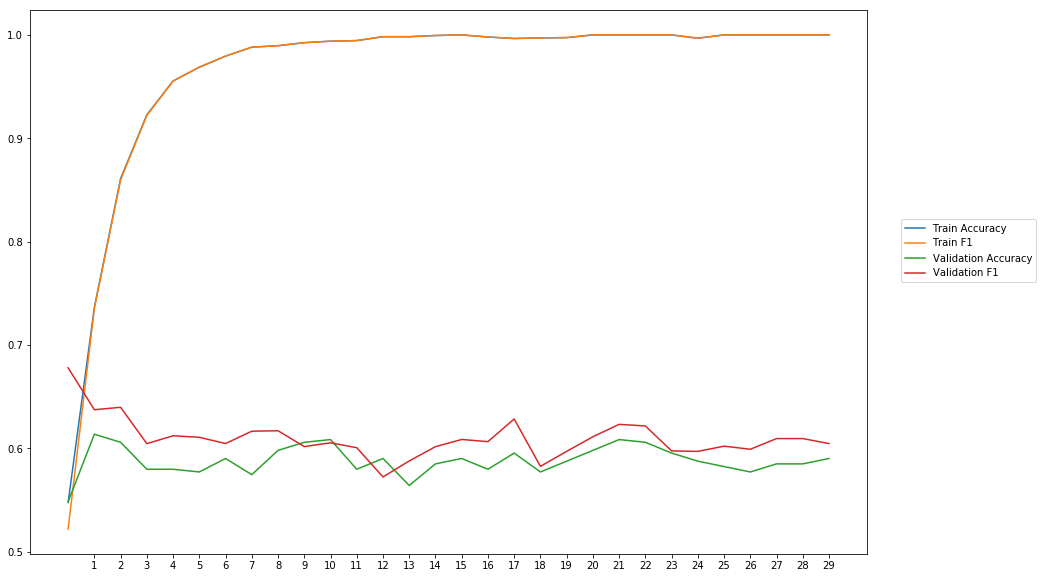

Average Accuracy: 58.81%
Average Precision: 58.20%
Average Recall: 64.41%
Average F1: 60.95%

-------Overallresults-------


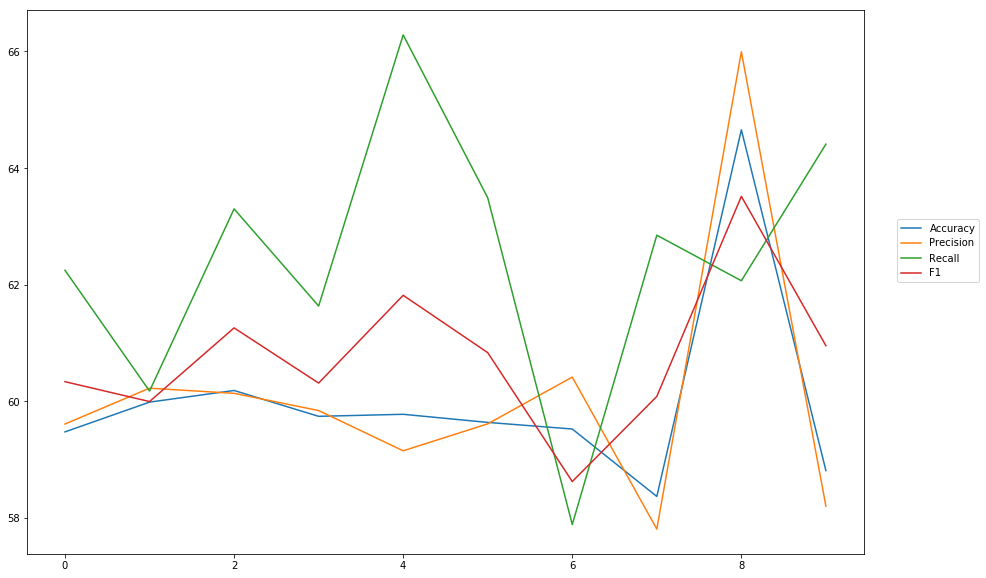

Accuracy: Mean = 60.01% (+/- 1.63%), Max = 64.66%, Min =  58.36%
Precision: Mean = 60.10% (+/- 2.13%), Max = 65.99%, Min =  57.80%
Recall: Mean = 62.43% (+/- 2.18%), Max = 66.28%, Min =  57.88%
F1: Mean = 60.77% (+/- 1.22%), Max = 63.51%, Min =  58.62%


In [10]:
#Train and test with 10-fold corss validation
cross_val(model2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'abilstm_2_400')  

## AttentiveBiLSTM two BiLSTM-layers, first 400 neurons, second 300

In [ ]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer3 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences3 = wv_layer3(comment_input3)

#LSTM Layer
x3 = Bidirectional(LSTM(400, activation='tanh', return_sequences=True))(embedded_sequences3)
x3 = Bidirectional(LSTM(300, return_sequences=True, activation='tanh'))(x3)

#Attention Layer
x3 = Attention()(x3)

#Output (Dense) Layer
preds3 = Dense(2, activation='softmax')(x3)

# build the model
model3 = Model(inputs=[comment_input3], outputs=preds3)


-----Fold 1--------


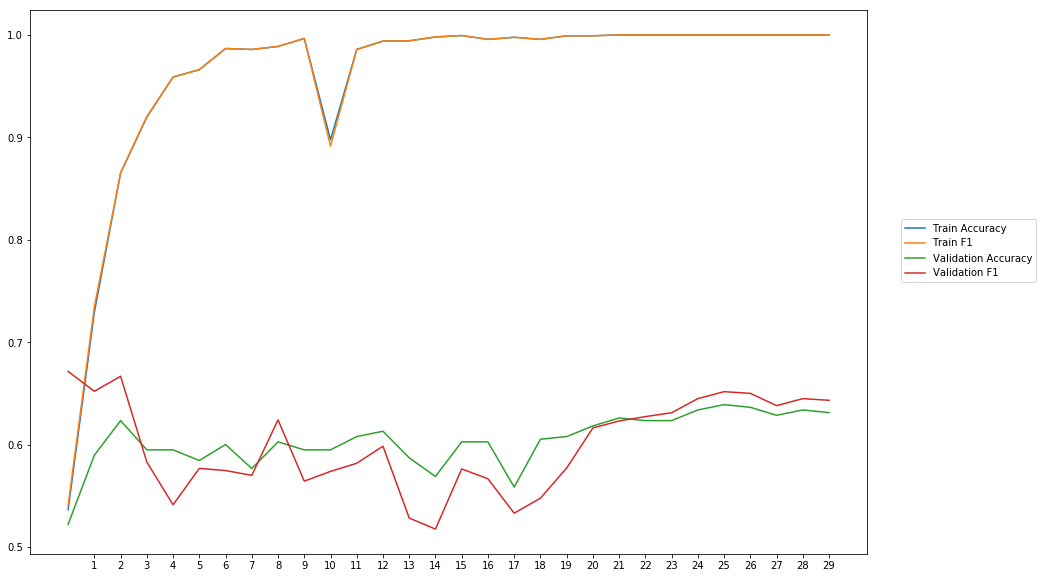

Average Accuracy: 60.42%
Average Precision: 60.99%
Average Recall: 60.09%
Average F1: 59.98%

-----Fold 2--------


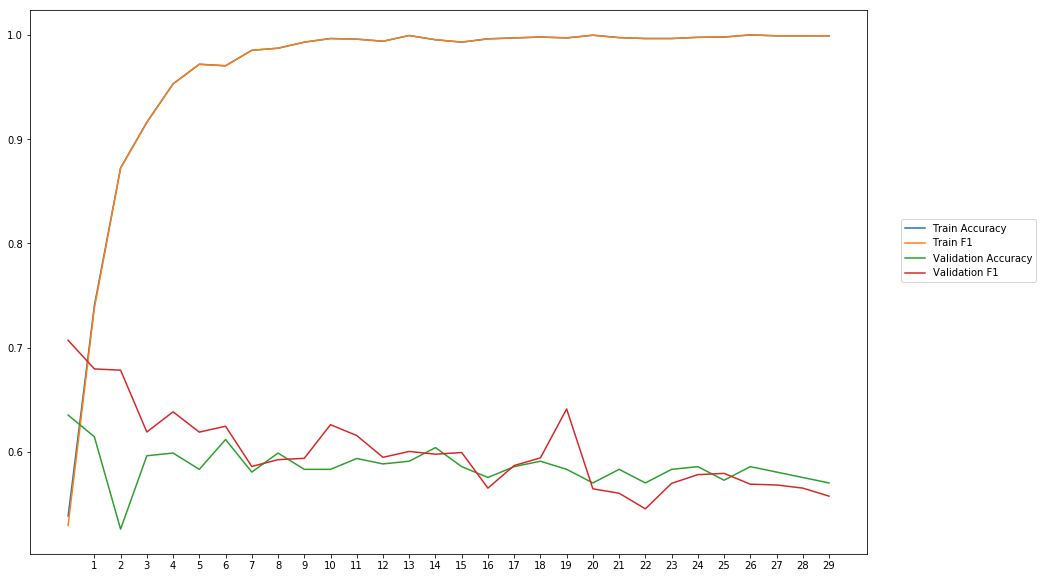

Average Accuracy: 58.64%
Average Precision: 58.43%
Average Recall: 62.80%
Average F1: 60.07%

-----Fold 3--------


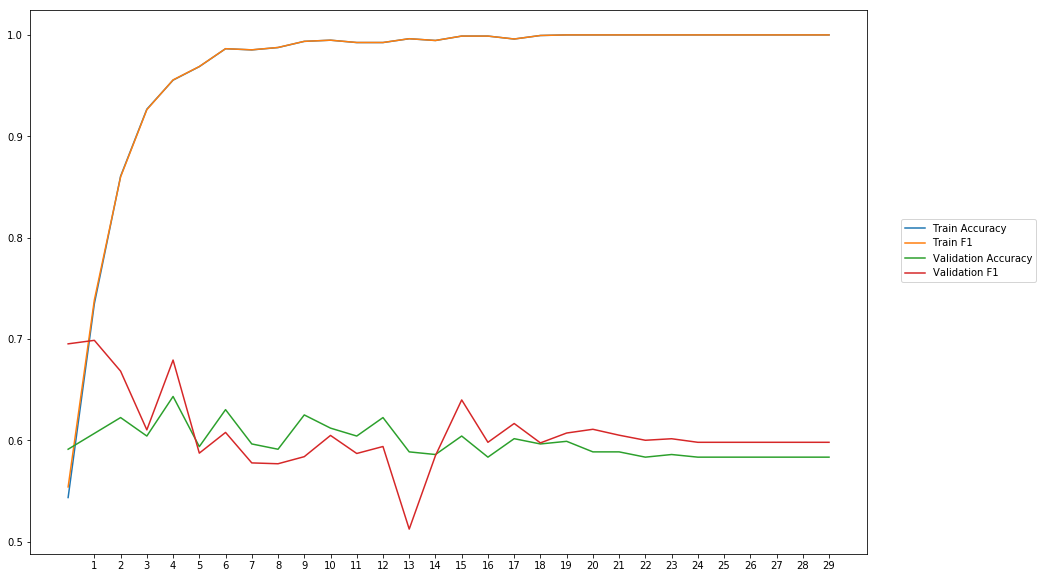

Average Accuracy: 59.83%
Average Precision: 59.83%
Average Recall: 62.73%
Average F1: 60.77%

-----Fold 4--------


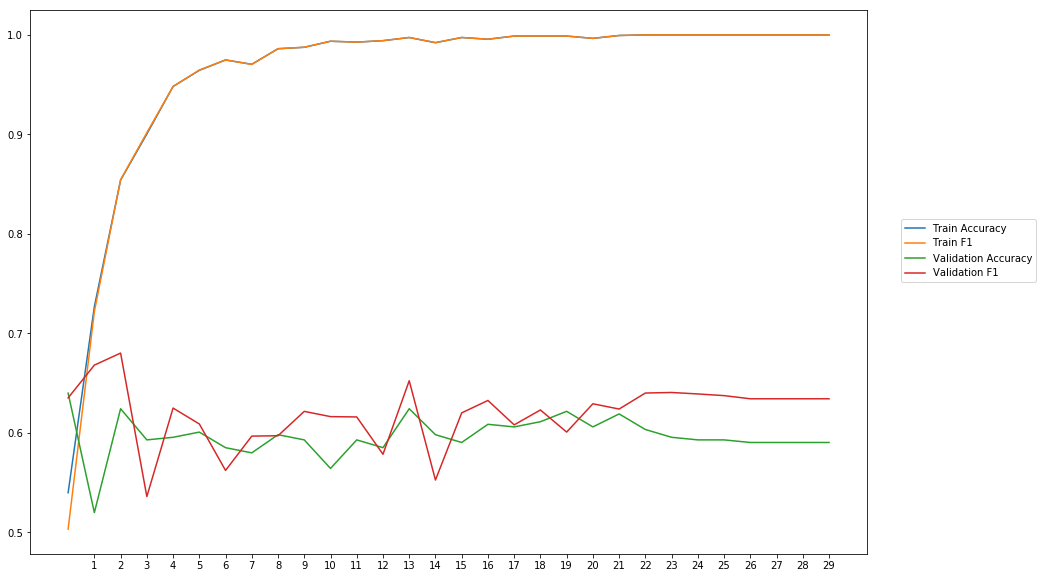

Average Accuracy: 59.65%
Average Precision: 59.05%
Average Recall: 66.04%
Average F1: 61.91%

-----Fold 5--------


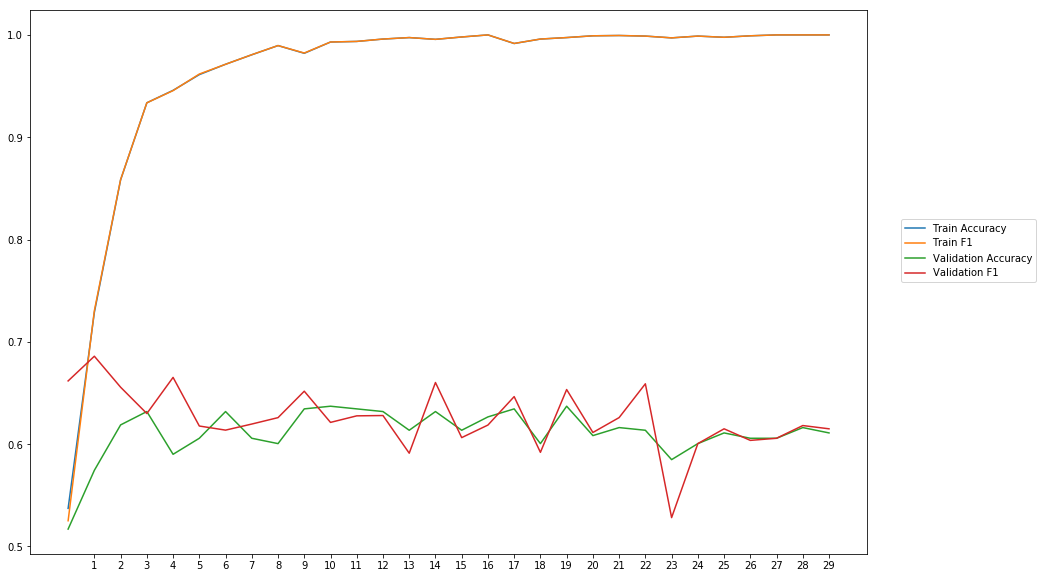

Average Accuracy: 61.15%
Average Precision: 60.93%
Average Recall: 65.30%
Average F1: 62.52%

-----Fold 6--------


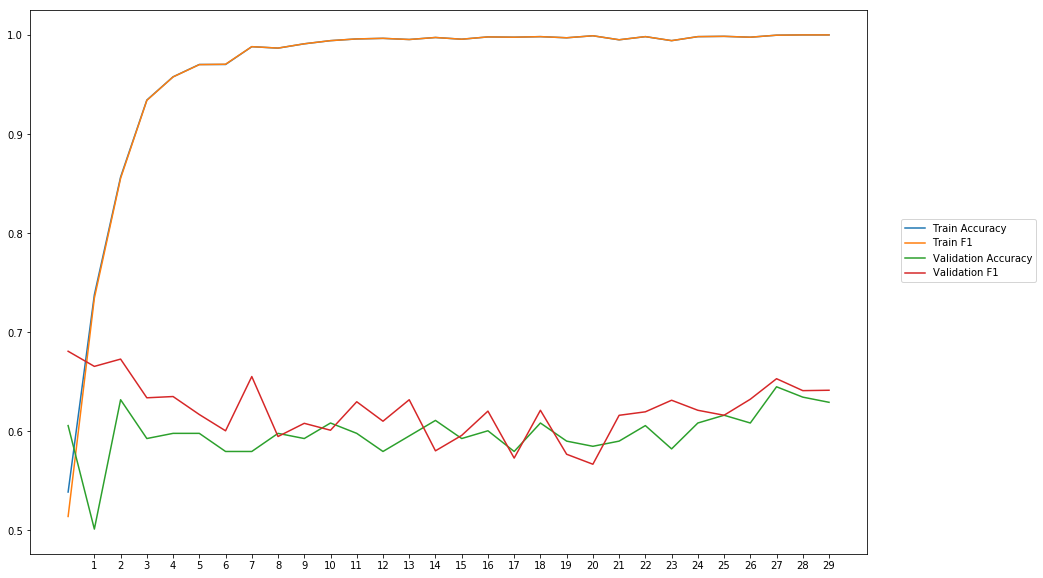

Average Accuracy: 59.82%
Average Precision: 59.18%
Average Recall: 66.34%
Average F1: 62.14%

-----Fold 7--------


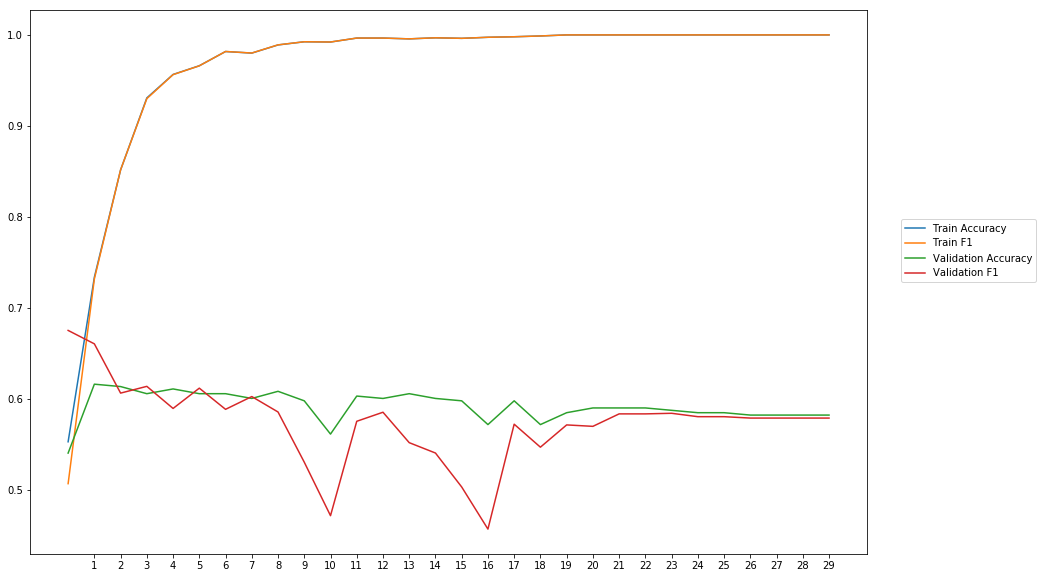

Average Accuracy: 59.19%
Average Precision: 60.43%
Average Recall: 55.94%
Average F1: 57.46%

-----Fold 8--------


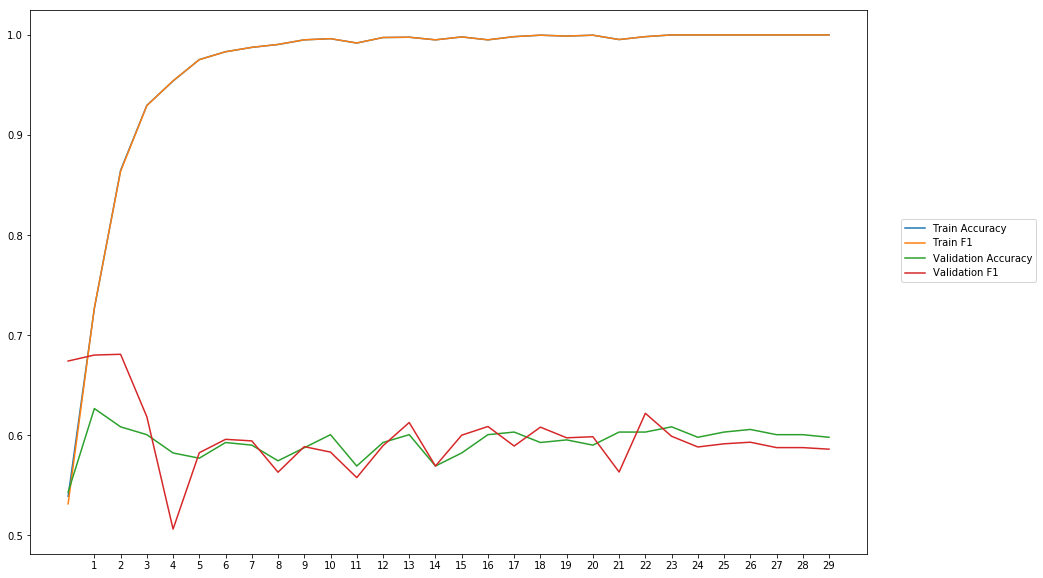

Average Accuracy: 59.33%
Average Precision: 59.46%
Average Recall: 60.87%
Average F1: 59.72%

-----Fold 9--------


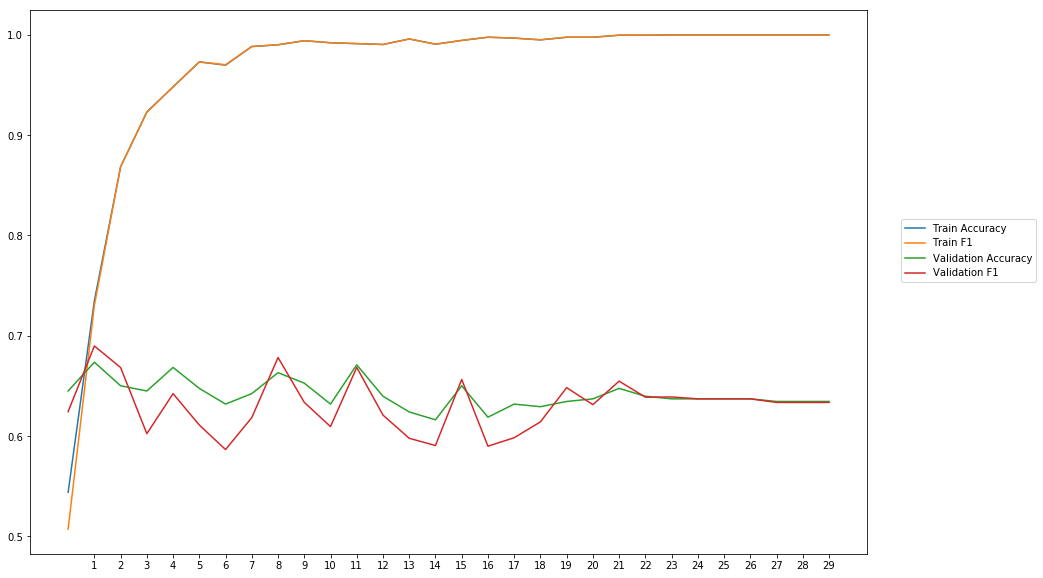

Average Accuracy: 64.14%
Average Precision: 65.20%
Average Recall: 61.39%
Average F1: 63.08%

-----Fold 10--------


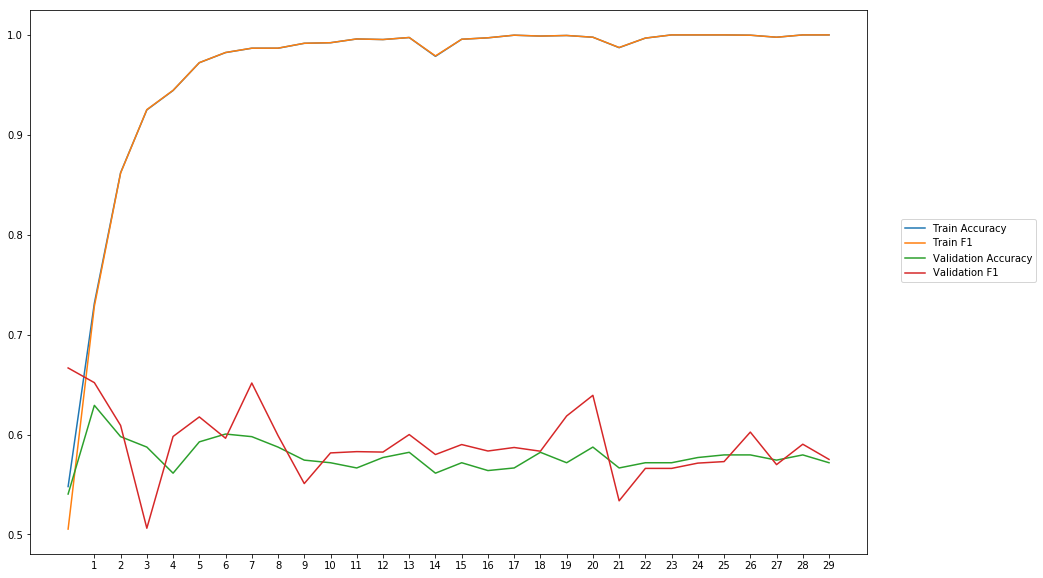

Average Accuracy: 57.82%
Average Precision: 57.63%
Average Recall: 61.37%
Average F1: 59.08%

-------Overallresults-------


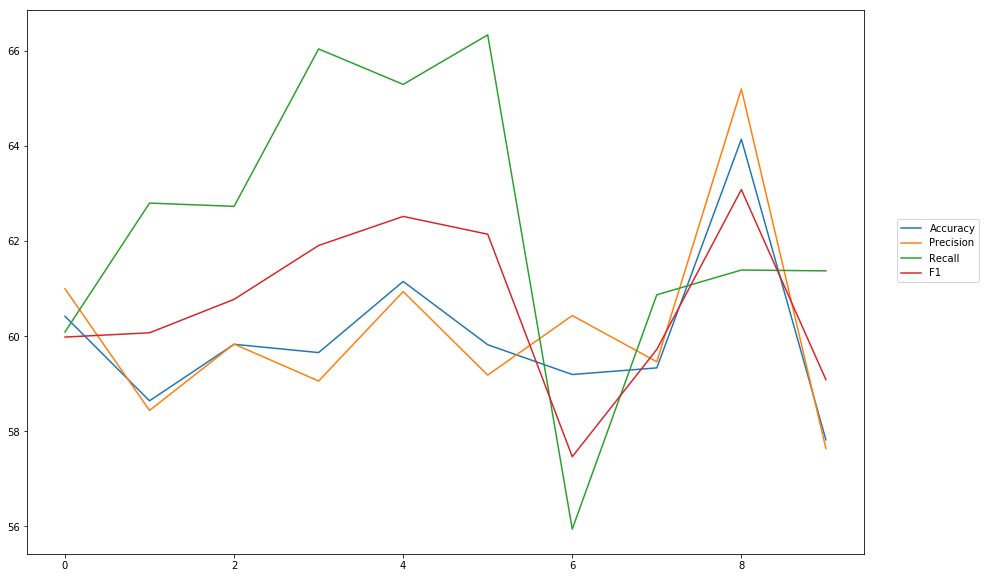

Accuracy: Mean = 60.00% (+/- 1.63%), Max = 64.14%, Min =  57.82%
Precision: Mean = 60.12% (+/- 1.97%), Max = 65.20%, Min =  57.63%
Recall: Mean = 62.29% (+/- 2.98%), Max = 66.34%, Min =  55.94%
F1: Mean = 60.67% (+/- 1.66%), Max = 63.08%, Min =  57.46%


In [11]:
#Train and test with 10-fold corss validation
cross_val(model3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'abilstm_2_400_300')  

## AttentiveBiLSTM one LSTM-layers, 500 neurons

In [12]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer4 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences4 = wv_layer4(comment_input4)

#LSTM Layer
x4 = Bidirectional(LSTM(500, return_sequences=True, activation='tanh'))(embedded_sequences4)

#Attention Layer
x4 = Attention()(x4)

#Output (Dense) Layer
preds4 = Dense(2, activation='softmax')(x4)

# build the model
model4 = Model(inputs=[comment_input4], outputs=preds4)

W0808 11:18:05.493504  7924 deprecation_wrapper.py:119] From C:\Users\schok\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 11:18:05.493504  7924 deprecation_wrapper.py:119] From C:\Users\schok\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 11:18:05.504156  7924 deprecation_wrapper.py:119] From C:\Users\schok\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 11:18:05.504156  7924 deprecation_wrapper.py:119] From C:\Users\schok\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0808 11:18:05.504156  7924 deprecation_wrapper.py:119] 

W0808 11:18:07.992940  7924 deprecation_wrapper.py:119] From C:\Users\schok\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 11:18:08.000076  7924 deprecation.py:323] From C:\Users\schok\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



-----Fold 1--------


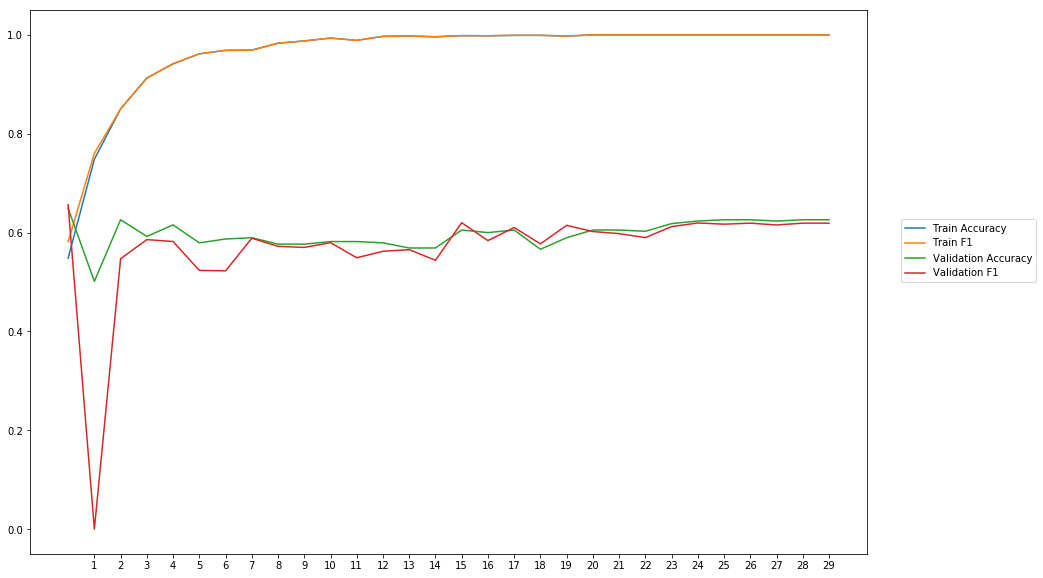

Average Accuracy: 59.74%
Average Precision: 58.60%
Average Recall: 55.59%
Average F1: 56.88%

-----Fold 2--------


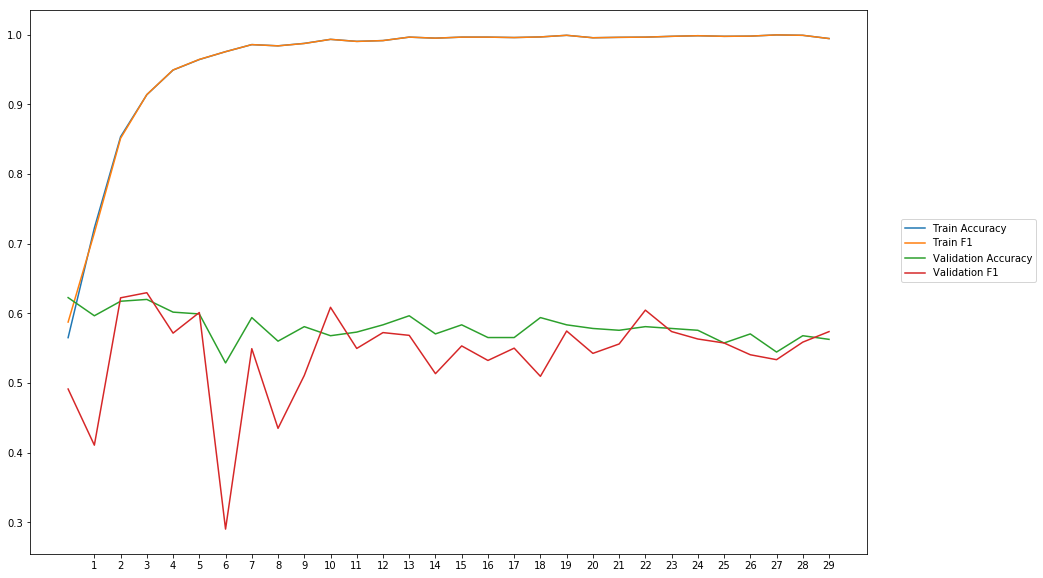

Average Accuracy: 57.97%
Average Precision: 59.61%
Average Recall: 51.22%
Average F1: 54.15%

-----Fold 3--------


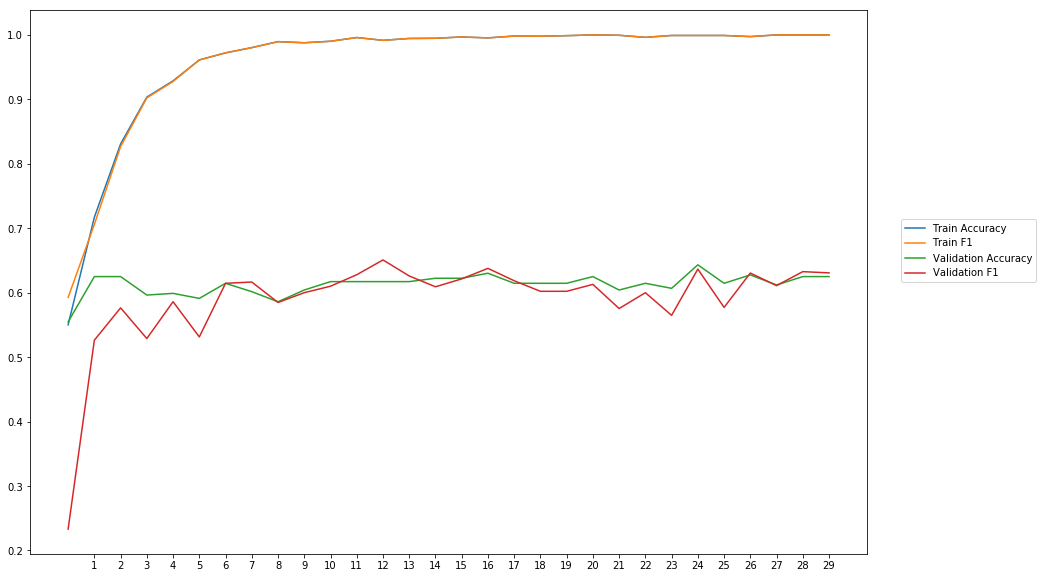

Average Accuracy: 61.28%
Average Precision: 62.69%
Average Recall: 57.40%
Average F1: 58.92%

-----Fold 4--------


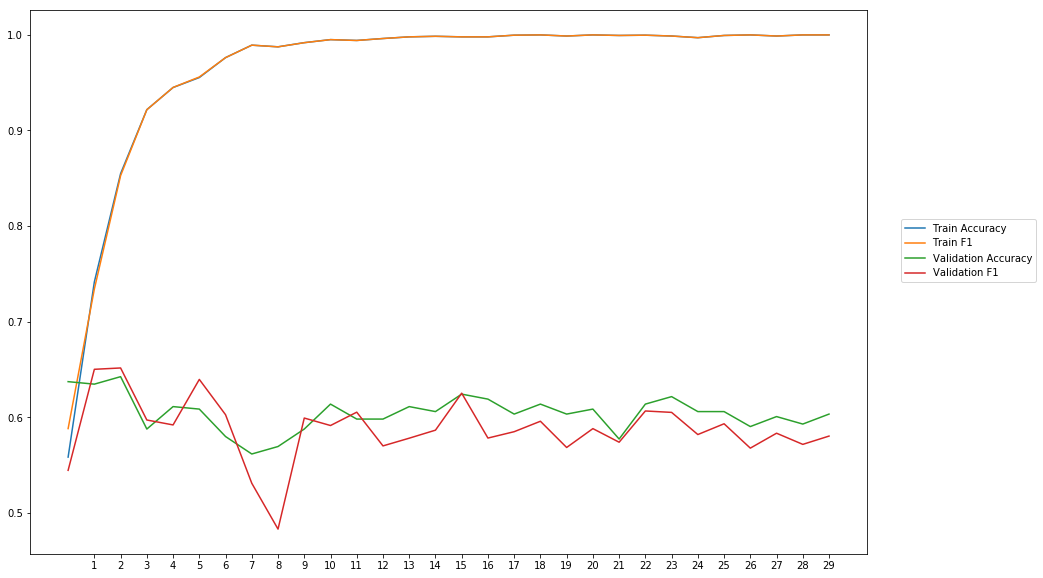

Average Accuracy: 60.42%
Average Precision: 61.30%
Average Recall: 56.86%
Average F1: 58.73%

-----Fold 5--------


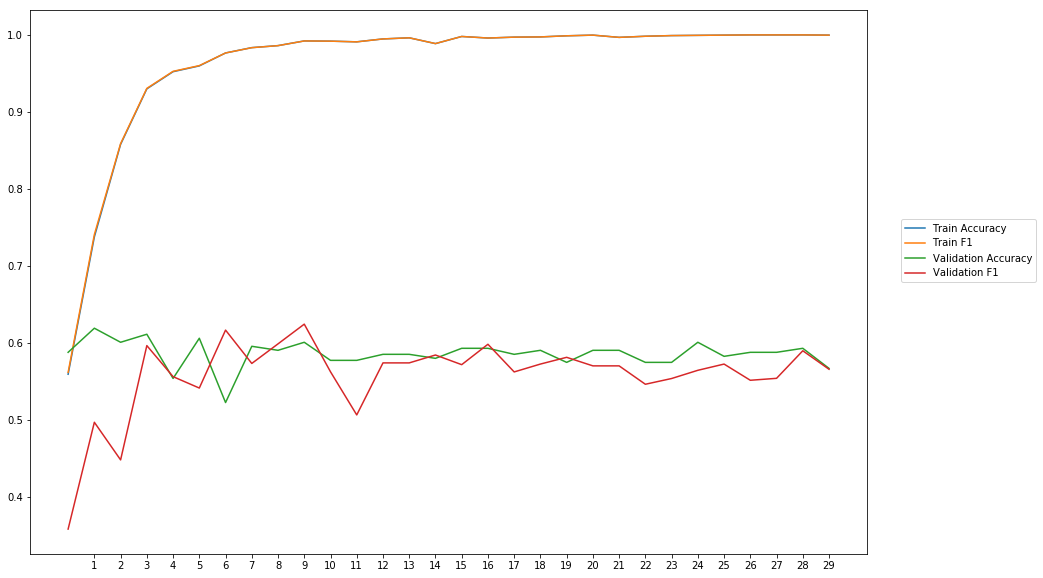

Average Accuracy: 58.56%
Average Precision: 60.56%
Average Recall: 53.42%
Average F1: 55.75%

-----Fold 6--------


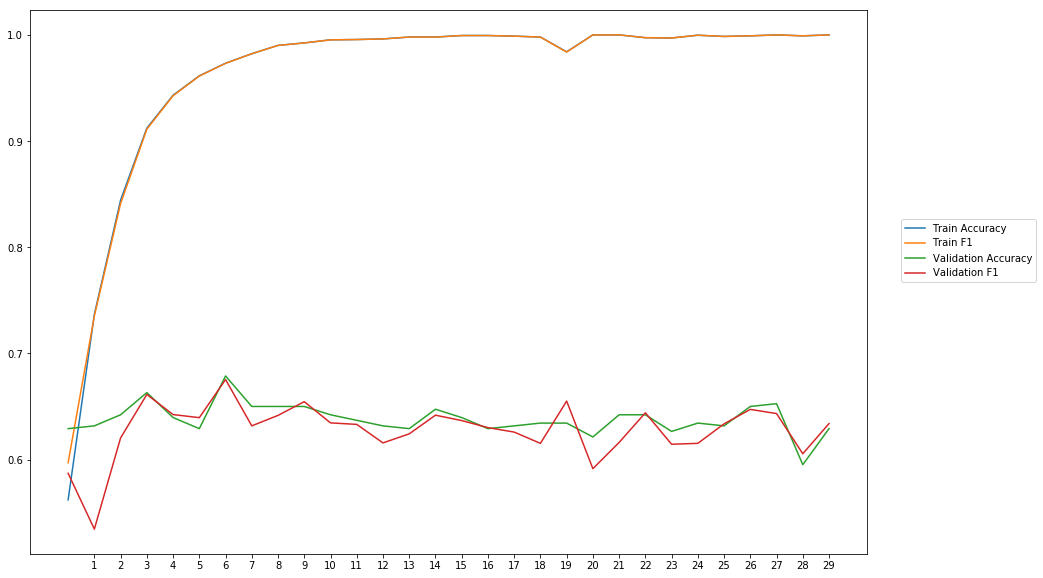

Average Accuracy: 63.83%
Average Precision: 64.53%
Average Recall: 61.57%
Average F1: 62.83%

-----Fold 7--------


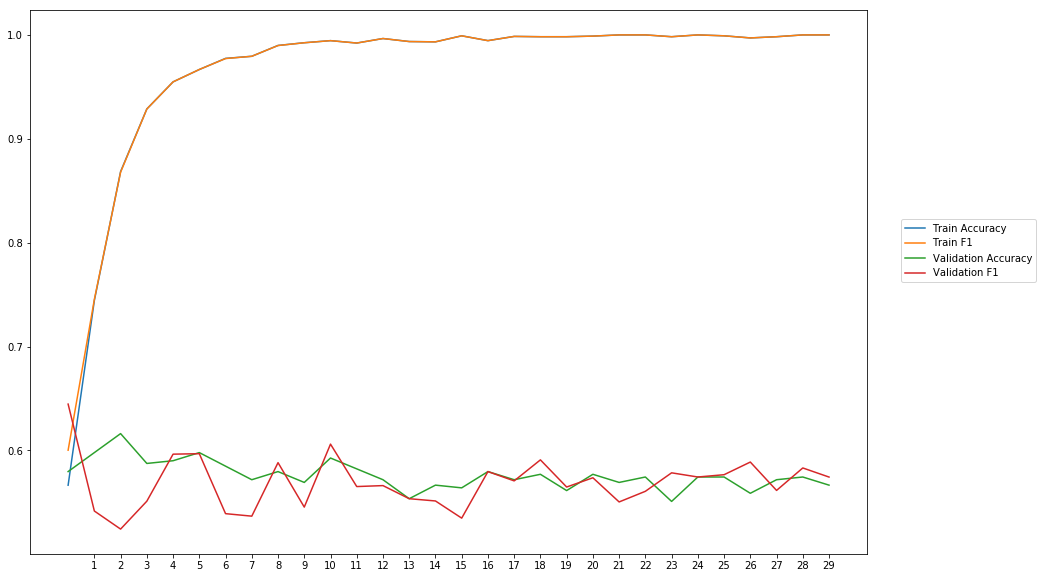

Average Accuracy: 57.62%
Average Precision: 57.95%
Average Recall: 56.42%
Average F1: 56.90%

-----Fold 8--------


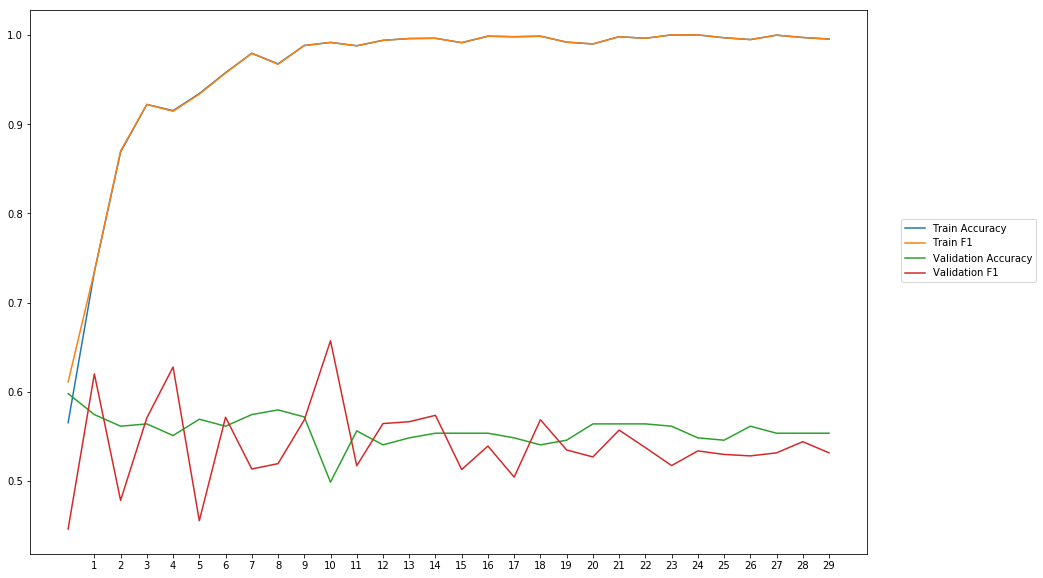

Average Accuracy: 55.71%
Average Precision: 56.55%
Average Recall: 53.63%
Average F1: 54.15%

-----Fold 9--------


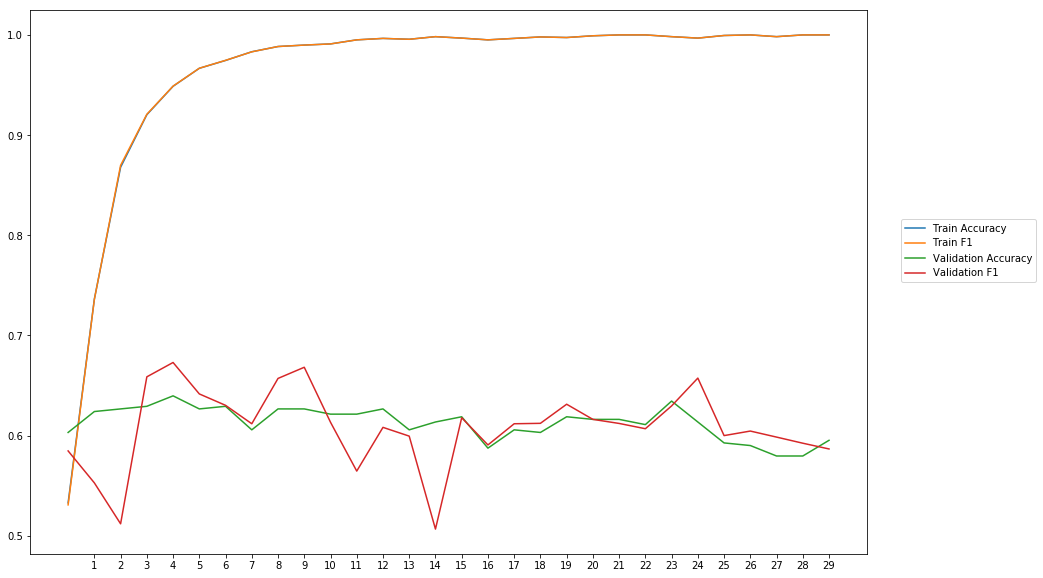

Average Accuracy: 61.30%
Average Precision: 61.74%
Average Recall: 61.05%
Average F1: 60.83%

-----Fold 10--------


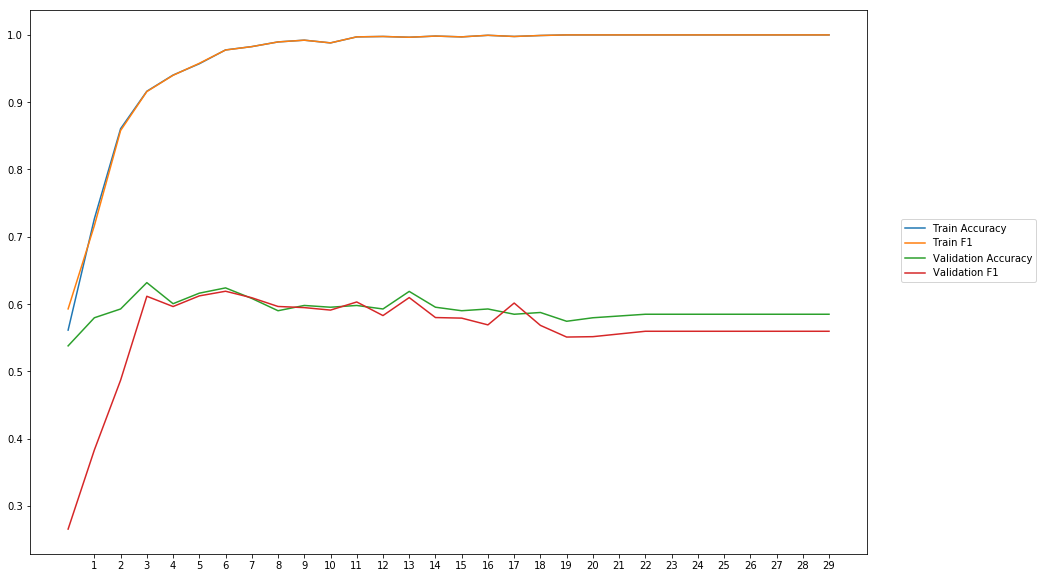

Average Accuracy: 59.16%
Average Precision: 60.60%
Average Recall: 53.40%
Average F1: 55.98%

-------Overallresults-------


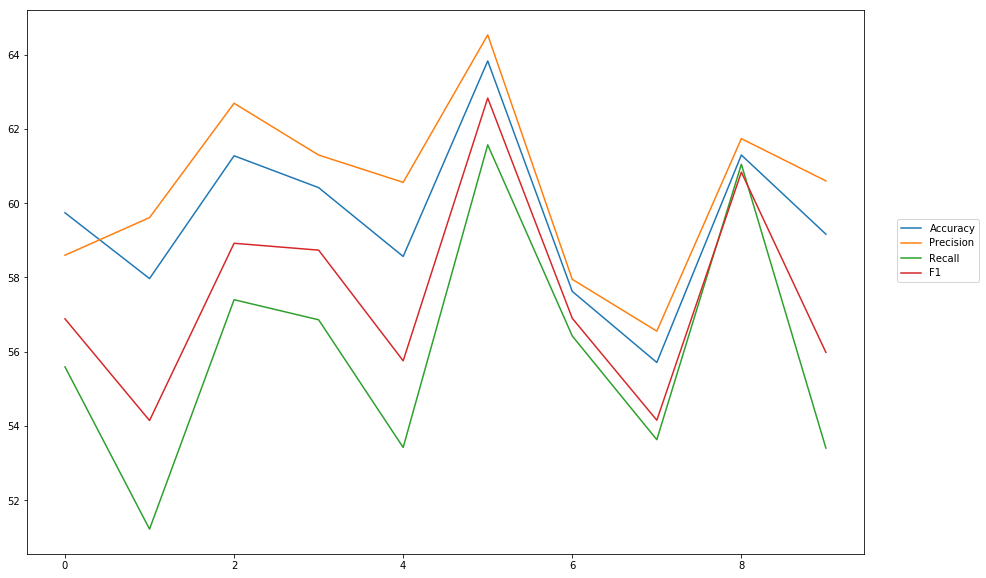

Accuracy: Mean = 59.56% (+/- 2.17%), Max = 63.83%, Min =  55.71%
Precision: Mean = 60.41% (+/- 2.23%), Max = 64.53%, Min =  56.55%
Recall: Mean = 56.06% (+/- 3.18%), Max = 61.57%, Min =  51.22%
F1: Mean = 57.51% (+/- 2.68%), Max = 62.83%, Min =  54.15%


In [13]:
#Train and test with 10-fold corss validation
cross_val(model4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'abilstm_1_500')  

## AttentiveBiLSTM one LSTM-layer, 300 neurons

In [ ]:
#Empedding: inputdim = length of vocabulary in input (text) data, outputdim = EMBEDDING_DIM
wv_layer5 = Embedding(len(word_index)+1,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=True)

#Input Layer
comment_input5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

#Embedding Layer
embedded_sequences5 = wv_layer5(comment_input5)

#LSTM Layer
x5 = Bidirectional(LSTM(300, return_sequences=True, activation='tanh'))(embedded_sequences5)

#Attention Layer
x5 = Attention()(x5)

#Output (Dense) Layer
preds5 = Dense(2, activation='softmax')(x5)

# build the model
model5 = Model(inputs=[comment_input5], outputs=preds5)


-----Fold 1--------


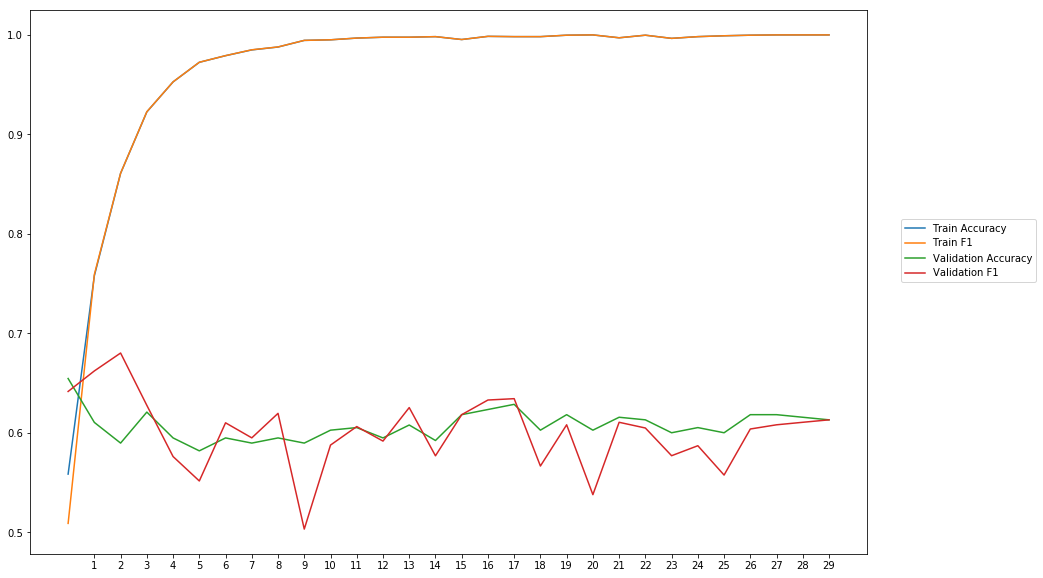

Average Accuracy: 60.72%
Average Precision: 61.34%
Average Recall: 59.59%
Average F1: 60.08%

-----Fold 2--------


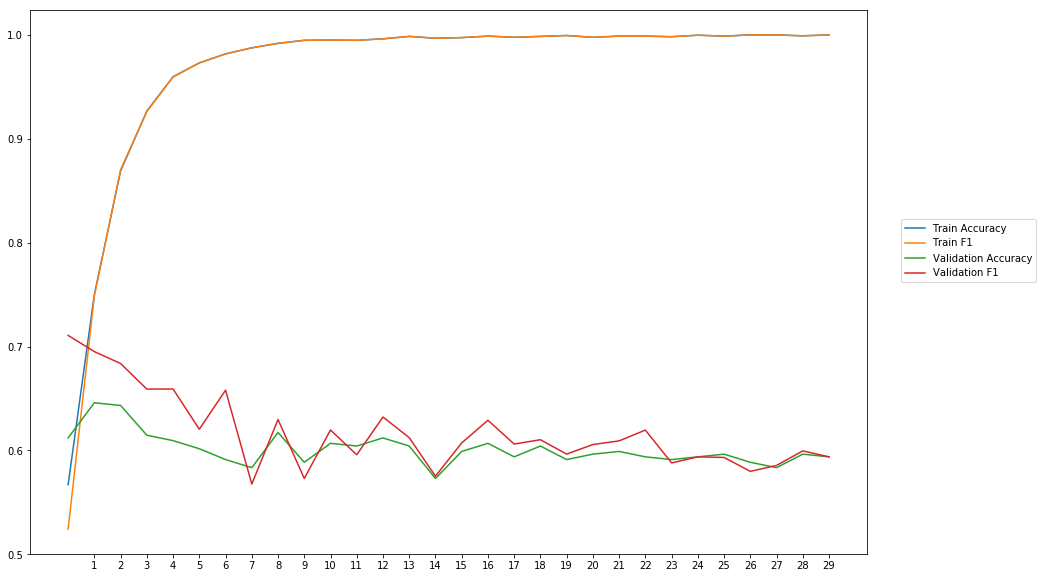

Average Accuracy: 60.11%
Average Precision: 59.58%
Average Recall: 64.58%
Average F1: 61.69%

-----Fold 3--------


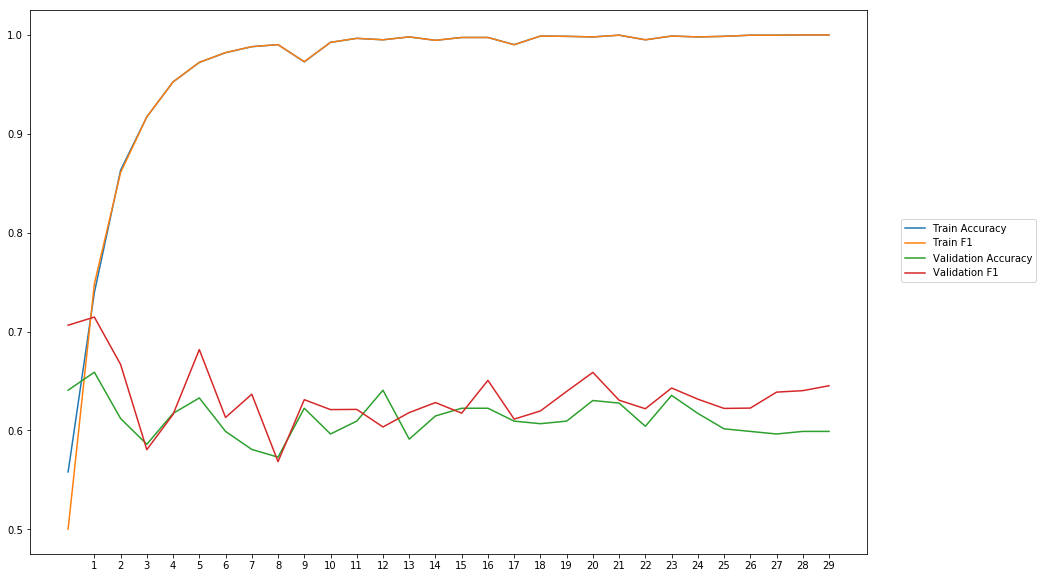

Average Accuracy: 61.18%
Average Precision: 60.34%
Average Recall: 67.17%
Average F1: 63.33%

-----Fold 4--------


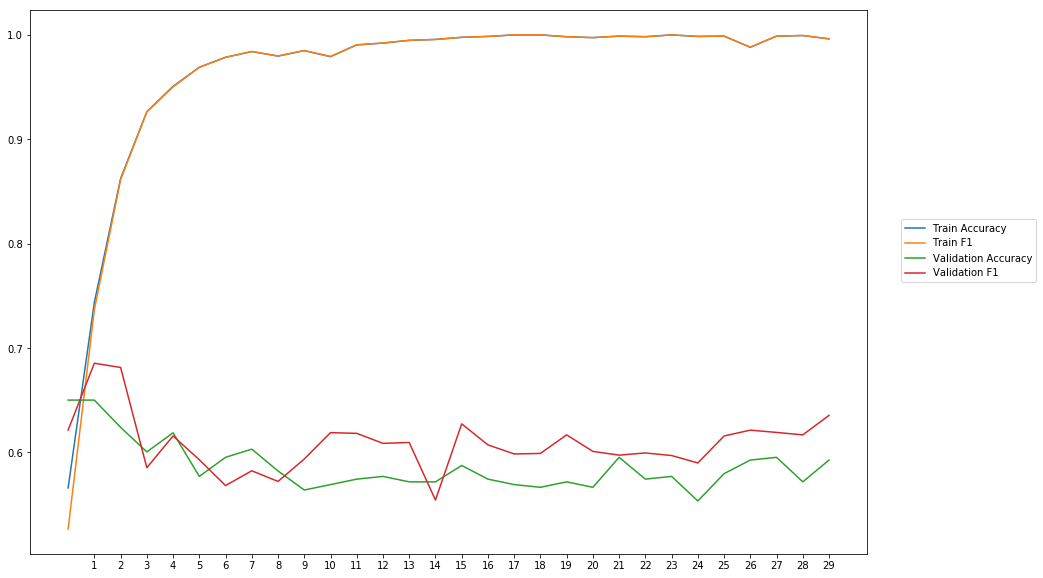

Average Accuracy: 58.66%
Average Precision: 58.09%
Average Recall: 64.34%
Average F1: 60.84%

-----Fold 5--------


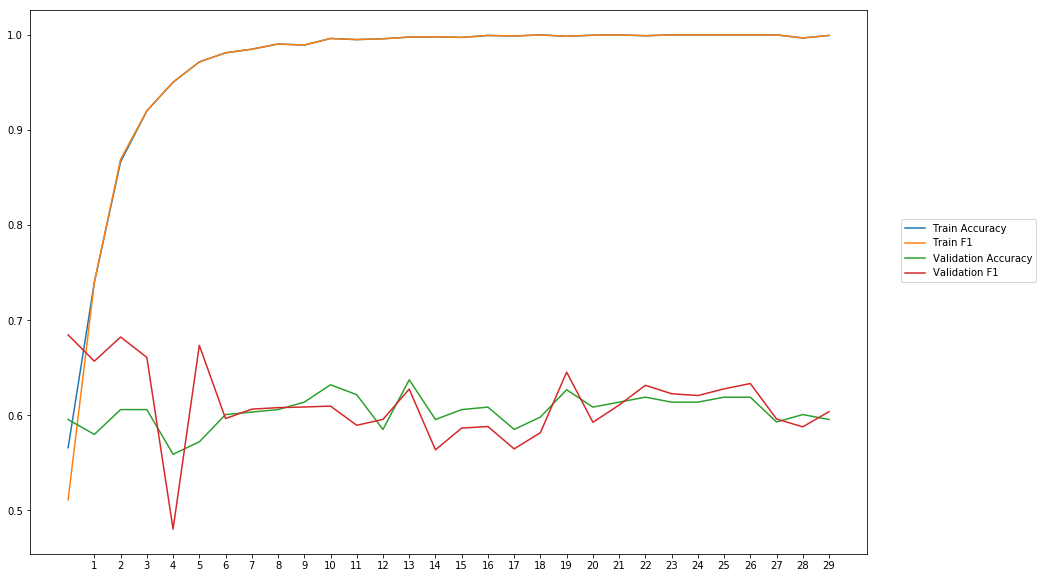

Average Accuracy: 60.43%
Average Precision: 60.42%
Average Recall: 62.95%
Average F1: 61.10%

-----Fold 6--------


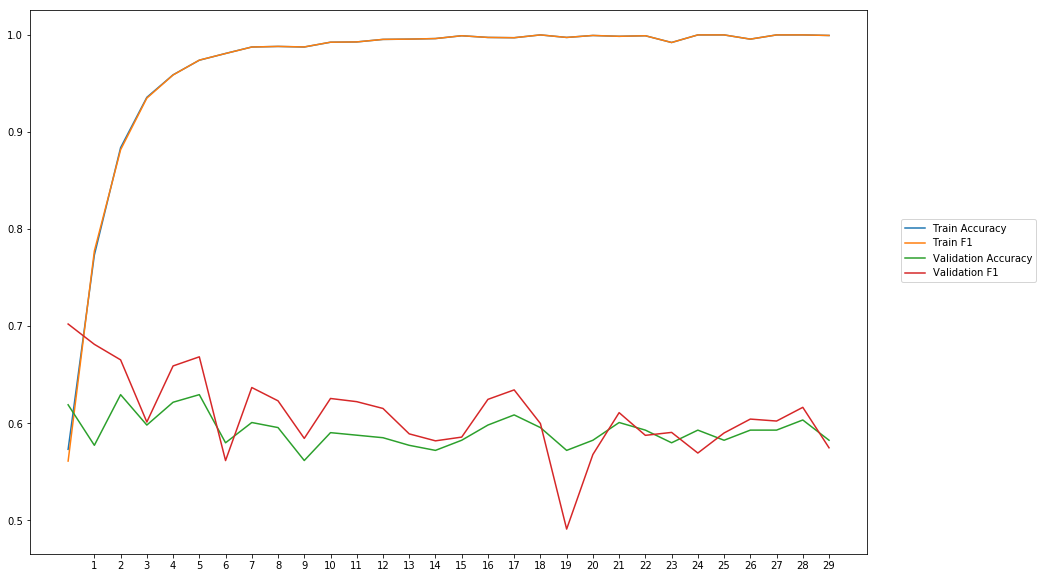

Average Accuracy: 59.26%
Average Precision: 58.68%
Average Recall: 64.05%
Average F1: 60.87%

-----Fold 7--------


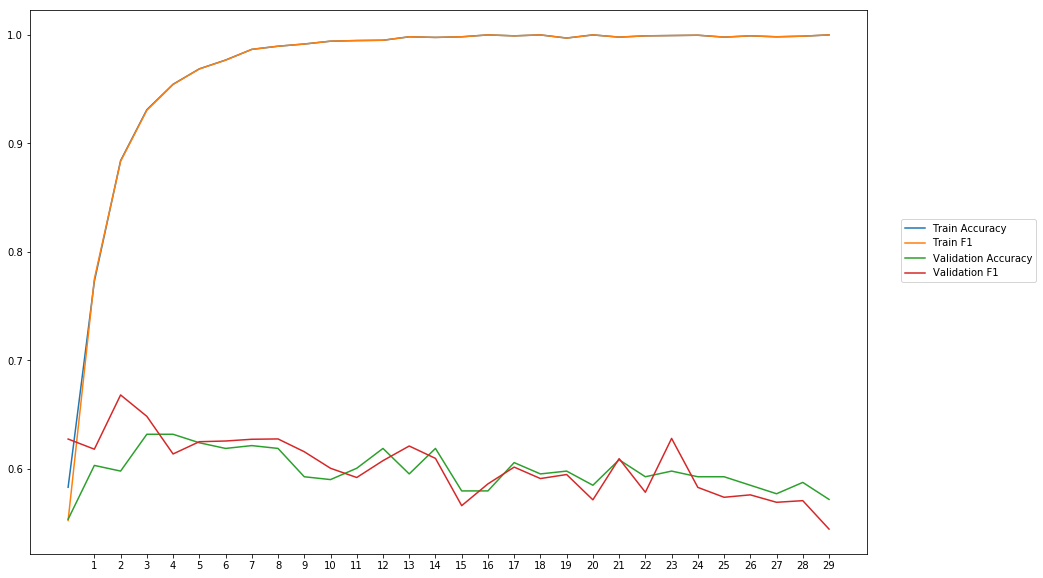

Average Accuracy: 59.89%
Average Precision: 59.95%
Average Recall: 60.92%
Average F1: 60.24%

-----Fold 8--------


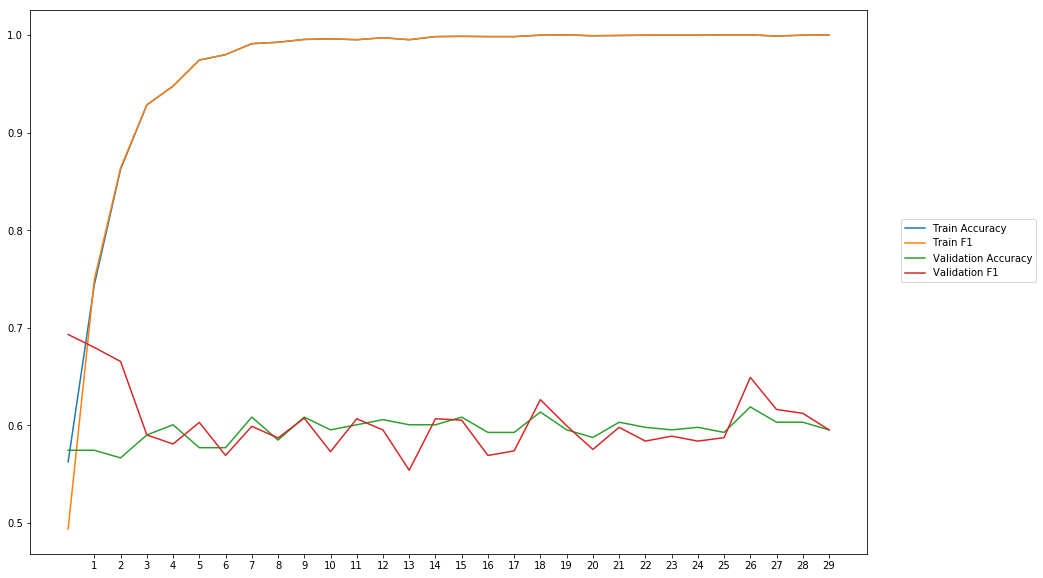

Average Accuracy: 59.54%
Average Precision: 59.60%
Average Recall: 61.98%
Average F1: 60.24%

-----Fold 9--------


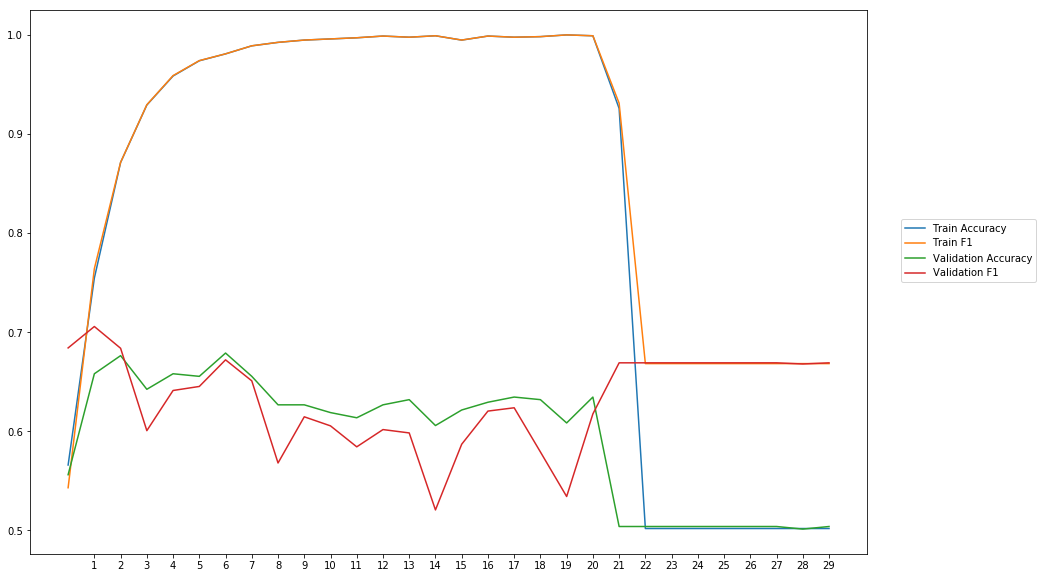

Average Accuracy: 59.41%
Average Precision: 60.63%
Average Recall: 71.91%
Average F1: 63.19%

-----Fold 10--------


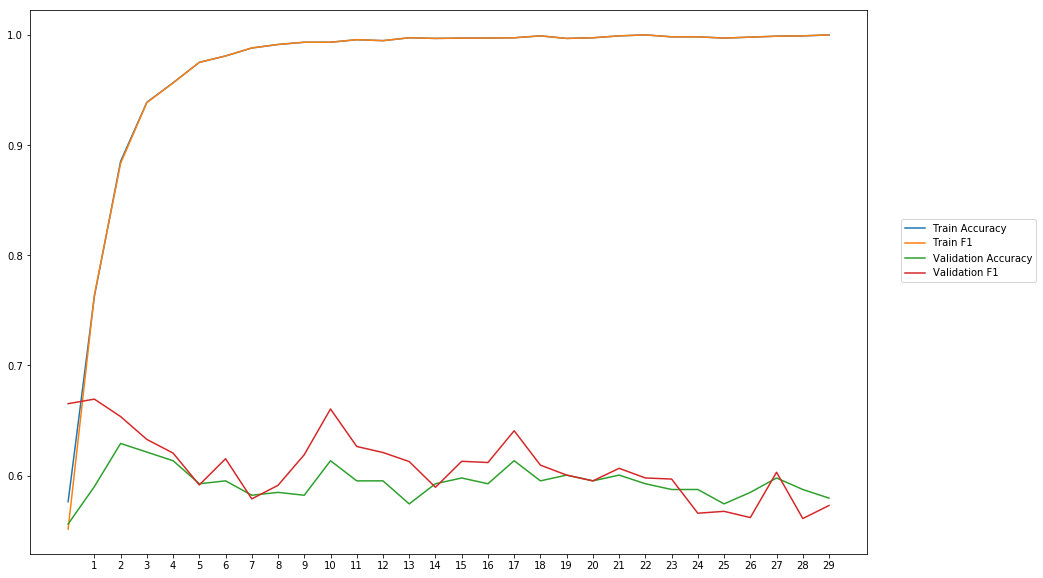

Average Accuracy: 59.36%
Average Precision: 58.92%
Average Recall: 63.51%
Average F1: 60.85%

-------Overallresults-------


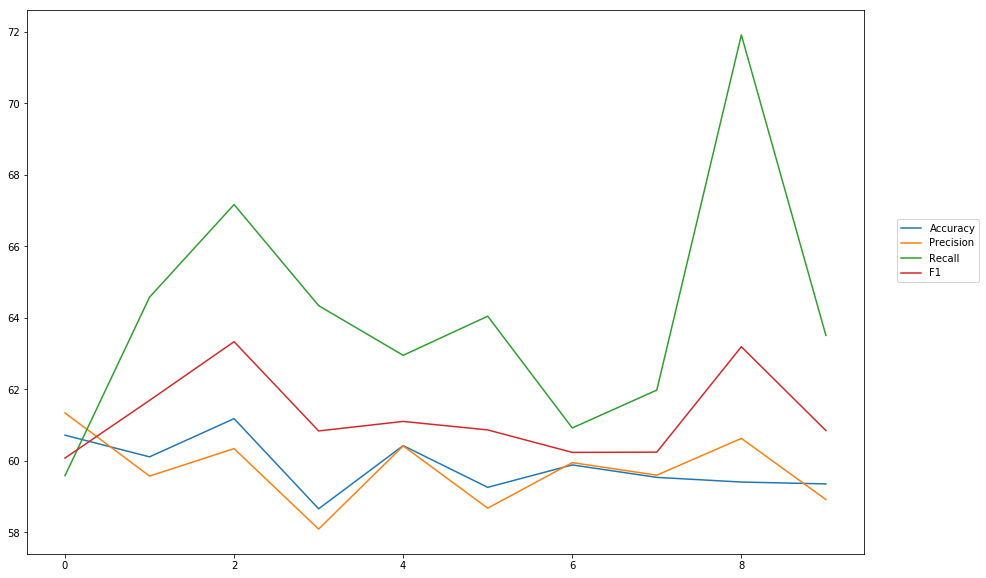

Accuracy: Mean = 59.85% (+/- 0.72%), Max = 61.18%, Min =  58.66%
Precision: Mean = 59.75% (+/- 0.94%), Max = 61.34%, Min =  58.09%
Recall: Mean = 64.10% (+/- 3.28%), Max = 71.91%, Min =  59.59%
F1: Mean = 61.24% (+/- 1.10%), Max = 63.33%, Min =  60.08%


In [12]:
#Train and test with 10-fold corss validation
cross_val(model5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'abilstm_1_300')  

## Train and evaluate the model with heldout testdata

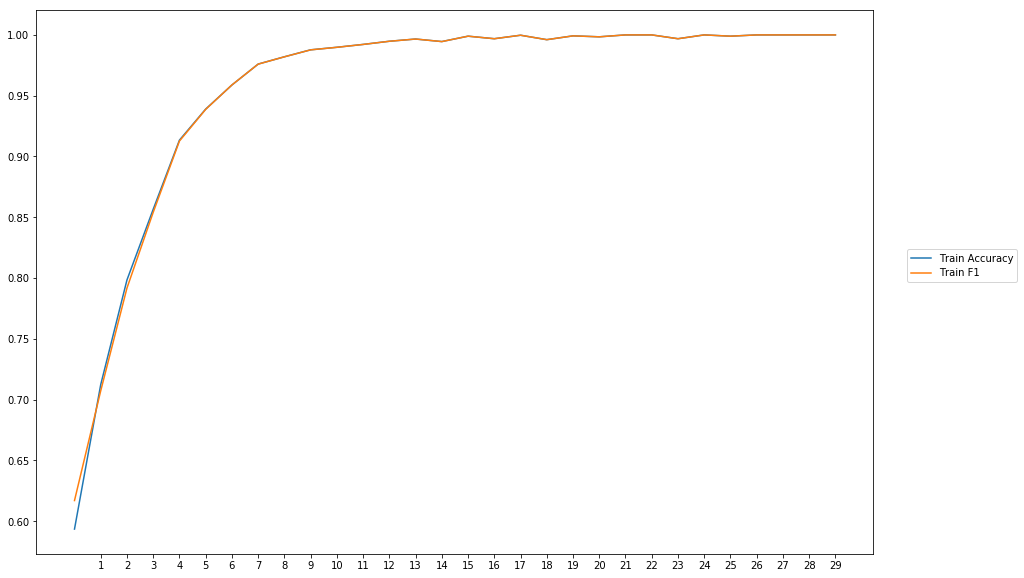


-----Test Scores----
Loss: 3.6006216029731597
Accuracy: 63.52040816326531
Precision: 53.21336759557498
Recall: 66.55948550914486
F1: 59.14285218804124


In [15]:
train_evaluate_final_model(model1, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_AttentiveBiLSTM')